<h6 style="text-align: center; color: darkblue;">MWC DATA SCIENCE HACKATON 2022</h6>

<h1 style="text-align: center; color: darkblue;">NUWEFRUIT</h1>

<p style="text-align: justify">Nuwefruit es una startup que busca revolucionar los hábitos de la población fomentando el cosumo de fruta a diario. Por este motivo, la empresa está especializada en la venta de fruta a domicilio, que gracias a su algoritmo de optimización de la última milla le permite tener unos costes logisticos muy bajos. Esto permite que Nuwefruit pueda vender fruta a un precio inferior al de su competencia. Su catálogo se basa en la venta de más de 20 tipos de frutas, que son las que presentan las mejores propiedades nutritivas.</p>

<h2 style="color: darkblue;">Tabla de contenidos</h2>
<ol>
    <li><a href="#eda">EDA - Análisis exploratorio de los datos</a>
        <ol>
            <li><a href="#carga-lib">Carga de librerias y ficheros</a></li>
            <li><a href="#adec">Adecuación de los datos</a></li>
            <li><a href="#aeb">Análisis estadístico básico</a></li>
            <li><a href="#outliers">Estudio de outliers</a></li>
            <li><a href="#analisis">Análisis</a>
                <ol>
                    <li><a href="#no-se">Análisis de los clientes: vision global</a></li>
                    <li><a href="#se">Análisis de los clientes por segmentos</a>
                        <ol>
                            <li><a href="#s1">Segmento 1</a></li>
                            <li><a href="#r-a-s1">Reglas de asociación del segmento 1</a></li>
                            <li><a href="#s2">Segmento 2</a></li>
                            <li><a href="#r-a-s2">Reglas de asociación del segmento 2</a></li>
                            <li><a href="#s3">Segmento 3</a></li>
                            <li><a href="#r-a-s3">Reglas de asociación del segmento 3</a></li>
                            <li><a href="#s4">Segmento 4</a></li>
                            <li><a href="#r-a-s4">Reglas de asociación del segmento 4</a></li>
                            <li><a href="#s5">Segmento 5</a></li>
                            <li><a href="#r-a-s5">Reglas de asociación del segmento 5</a></li>
                            <li><a href="#s6">Segmento 6</a></li>
                            <li><a href="#r-a-s6">Reglas de asociación del segmento 6</a></li>
                            <li><a href="#consumo-segmento">Diferencia de consumo entre segmentos</a></li>
                            <li><a href="#mas-ordenes">Segmento que realiza más ordenes de compra</a></li>
                            <li><a href="#mas-devo">Segmento que realiza más devoluciones</a></li>
                        </ol>
                    </li>
                </ol>
            </li>
        </ol>
    </li>
    <li><a href="#estudio-promocion">Estudio de la promoción y su efecto</a></li>
    <li><a href="#modelo-pred">Modelo predictivo - clasificación de los clientes</a></li>
</ol>

<h2 id="eda" style="text-align: center; color: darkblue;">EDA - Análisis exploratorio de los datos</h2>

<h3 id="carga-libr" style="color: darkblue;">Carga de librerias y ficheros</h3>

In [2]:
import warnings

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import cluster           
from sklearn import decomposition  
from statistics import mode

from io import StringIO
from IPython.display import Image
from matplotlib.colors import ListedColormap

import pydotplus

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
client_table = pd.read_csv("hackatonMWC\mwc22-client_table.csv", header=0)
order_table = pd.read_csv("hackatonMWC\mwc22-orders_table.csv", header=0)

In [4]:
client_table.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0


In [5]:
check_for_nan_client_table = client_table.isnull().any().any()
print("¿Hay valores null al DataFrame ClientTable?",check_for_nan_client_table)

¿Hay valores null al DataFrame ClientTable? False


In [6]:
order_table.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [7]:
check_for_nan_order_table = order_table.isnull().any().any()
print("¿Hay valores null al DataFrame OrderTable?",check_for_nan_order_table)

¿Hay valores null al DataFrame OrderTable? False


<h3 id="adec" style="color: darkblue;">Adecuación de los datos</h3>

In [8]:
def replace_comma(table_and_column):
    """
    Función para cambiar las comas decimales
    por puntos.
    
    """
    for index, i in enumerate(table_and_column):
        table_and_column[index] = str(i).replace(",", ".")

In [9]:
warnings.filterwarnings('ignore')

replace_comma(client_table['AVG CONSO'])
replace_comma(client_table['AVG BASKET SIZE'])

In [10]:
client_table['AVG CONSO'] = client_table['AVG CONSO'].astype("float", errors="raise")
client_table['AVG BASKET SIZE'] = client_table['AVG BASKET SIZE'].astype("float", errors="raise")

In [11]:
order_table['FRUIT_PRODUCT'] = order_table['FRUIT_PRODUCT'].astype("string")

<h3 id="aeb" style="color: darkblue;">Análisis estadístico básico</h3>

In [30]:
client_table.iloc[:, 2:4].describe()

,AVG CONSO,AVG BASKET SIZE
count,35884.000000,35884.000000
mean,64.534437,181.218610
std,64.381932,129.604691
min,0.830000,10.000000
25%,20.830000,100.000000
50%,50.000000,160.000000
75%,88.170000,225.000000
max,2433.330000,3400.200000


<ul>
    <li><strong>AVG CONSO</strong> - La media está disparada (64) en comparación con la mediana (50), esto es por la presencia de outliers, datos que trataremos, como el valor máximo: 2433.</li>
    <li><strong>AVG BASKET SIZE</strong> - La media está más elevada que la mediana. Observamos que el valor máximo es de 3400, indicador de la existencia de outliers a tratar.</li>
</ul>

In [25]:
order_table.iloc[:, 1].describe()

count    66912.000000
mean         4.528112
std          5.788227
min        -80.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        198.000000
Name: NB PRODS, dtype: float64

<ul>
    <li><strong>NB PRODS</strong> - Observamos que los prod (1 prod = 10 peces fruita) tienen valores negativos (devoluciones), y valores extremos, como 198. Si tenemos en cuenta que el valor que divide el conjunto de datos en 50% es 3 PRODS, el valor máximo y mínimo, es considerado outlier.</li>
</ul>

<h3 id="outliers" style="color: darkblue;">Outliers tabla client_table: AVG CONSO y AVG BASKET SIZE</h3>

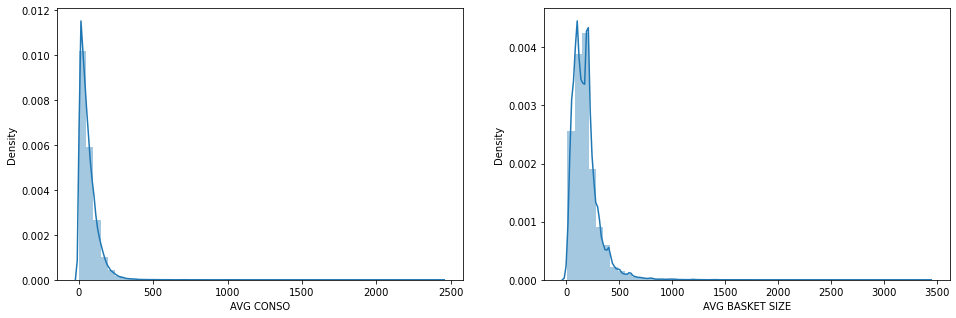

In [31]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(client_table['AVG CONSO'])
plt.subplot(1, 2, 2)
sns.distplot(client_table['AVG BASKET SIZE'])
plt.show()

In [32]:
IQR_avg_conso = 88.17 - 20.83
IQR_avg_basket_size = 225 - 100

In [33]:
print("Valor més alt tingut en compte per la variable de consum mig mensual:",
      client_table['AVG CONSO'].mean() + 1.5*IQR_avg_conso)
upper_avg_conso = client_table['AVG CONSO'].mean() + 1.5*IQR_avg_conso

print("\nValor més baix tingut en compte per la variable de consum mig mensual:",
      client_table['AVG CONSO'].mean() - 1.5*IQR_avg_conso,
      "\nPer tant, no hi ha outliers per sota")
lower_avg_conso = client_table['AVG CONSO'].min()

print("\nValor més alt tingut en compte per la variable de tamany mig de la cistella en fruita:",
      client_table['AVG BASKET SIZE'].mean() + 1.5*IQR_avg_basket_size)
upper_avg_basket_size = client_table['AVG BASKET SIZE'].mean() + 1.5*IQR_avg_basket_size

print("\nValor més baix tingut en compte per la variable de tamany mig de la cistella en fruita:",
      client_table['AVG BASKET SIZE'].mean() - 1.5*IQR_avg_basket_size,
     "\nPer tant, no hi ha outliers per sota")
lower_avg_basket_size = client_table['AVG BASKET SIZE'].min()

Valor més alt tingut en compte per la variable de consum mig mensual: 165.54443679634394

Valor més baix tingut en compte per la variable de consum mig mensual: -36.475563203656066 
Per tant, no hi ha outliers per sota

Valor més alt tingut en compte per la variable de tamany mig de la cistella en fruita: 368.71860968676924

Valor més baix tingut en compte per la variable de tamany mig de la cistella en fruita: -6.281390313230759 
Per tant, no hi ha outliers per sota


<p>Para tratar los outliers utilizamos la fórmula: $$\overline{df_{column}} \pm 1.5*IQR$$ para calcular el valor màximo y mínimo a tener en cuenta.</p><br /><p>Una vez tenemos los valores, procedemos a reemplazar los valores que superen nuestro upper limit por la mediana de la columna analizada:</p>

In [34]:
for index, i in enumerate(client_table['AVG CONSO']):
    if i > upper_avg_conso:
        client_table['AVG CONSO'][index] = client_table['AVG CONSO'].median()

In [35]:
for index, i in enumerate(client_table['AVG BASKET SIZE']):
    if i > upper_avg_basket_size:
        client_table['AVG BASKET SIZE'][index] = client_table['AVG BASKET SIZE'].median()

<h3 id="analisis" style="color: darkblue;">Análisis</h3>

Para realizar el análisis, primero analizaremos el conjunto de clientes de forma global, y finalmente obtendremos los segmentos existentes de los clientes y los analizaremos uno a uno.

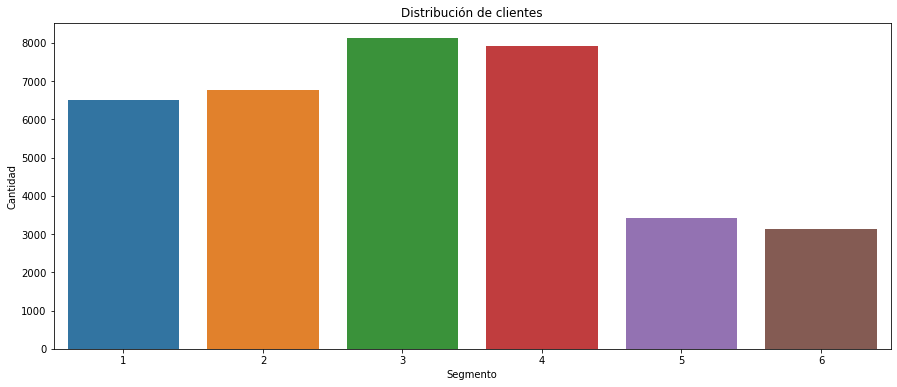

In [42]:
plt.figure(figsize=(15, 6))
sns.countplot(x=client_table['CLIENT_SEGMENT'], data=client_table)
plt.title("Distribución de clientes")
plt.ylabel("Cantidad")
plt.xlabel("Segmento")
plt.show()

<h4 id="no-se" style="color: darkblue;">Análisis de los clientes: vision global</h4>

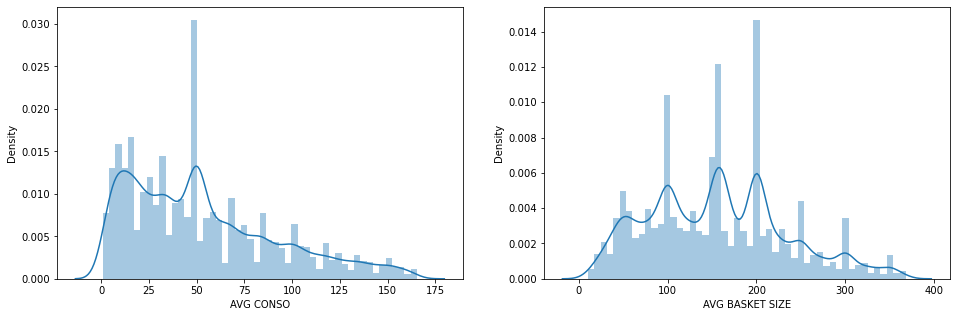

In [36]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(client_table['AVG CONSO'])
plt.subplot(1, 2, 2)
sns.distplot(client_table['AVG BASKET SIZE'])
plt.show()

<p>Como podemos ver en las imagenes, una vez removidos los outliers, se puede hacer un análisis más exhaustivo</p>.
<p>Para la variable AVG CONSO, observamos que el consumo medio mensual en piezas de fruta fluctua, pero tiene una clara tendencia decreciente. El valor que más se repite és el de 50 piezas de fruta.<br/>Las fluctuaciones pueden ser dadas por el segmento del cliente al que pertenece esa area de consumo.</p>
<p>Para la variable AVG BASKET SIZE observamos que tiene fluctuaciones, como la variable AVG CONSO, que de igual forma, puede ser dada por el segmento del cliente al que pertenece ese basket size.<br />Observamos como hay una tendencia creciente hasta el basket size = 100, y a partir de allí, una tendencia decreciente.<br />El valor máximo se obtiene cuando x=20</p>

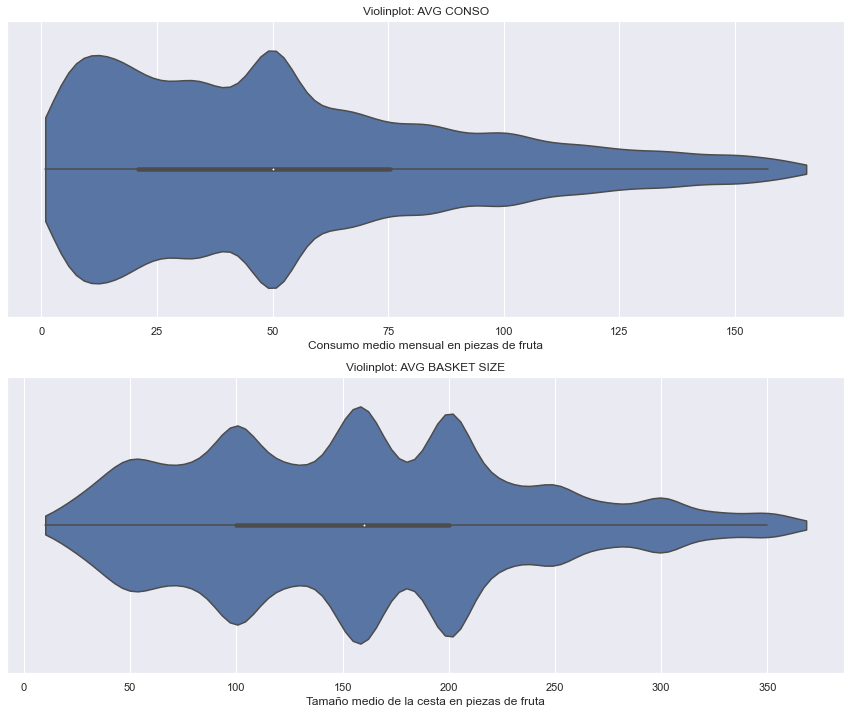

In [57]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=client_table['AVG CONSO'], cut=0)
plt.title("Violinplot: AVG CONSO")
plt.xlabel("Consumo medio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=client_table['AVG BASKET SIZE'], cut=0)
plt.title("Violinplot: AVG BASKET SIZE")
ax.set_xlabel("Tamaño medio de la cesta en piezas de fruta")
plt.show()

In [59]:
client_table[['AVG CONSO', 'AVG BASKET SIZE']].describe()

,AVG CONSO,AVG BASKET SIZE
count,35884.000000,35884.000000
mean,53.242013,156.504178
std,38.909919,77.730047
min,0.830000,10.000000
25%,20.830000,100.000000
50%,50.000000,160.000000
75%,75.420000,200.000000
max,165.420000,368.330000


<p>Podemos observar más datos del violinplot, con ayuda de la tabla descriptiva.</p>
<ul>
    <li><b>Variable AVG CONSO</b><br />El valor promedio es 53 piezas de fruta de consumo medio por cliente y por mes, el 50% de los clientes consumen, de media, entre 75 y 20 piezas de fruta al mes.</li>
    <li><b>Variable AVG BASKET SIZE</b><br />El valor promedio es 156 piezas de fruta compradas por cliente, el 50% de los clientes compran, de media, entre 200 y 100 piezas de fruta.</li>
</ul>

A continuación crearemos una tabla que nos será de ayuda cuando analicemos el consumo de los clientes por segmento.

In [60]:
fruit_per_order = order_table.groupby(['ORDER ID', 'CLIENT ID'], as_index=False)['FRUIT_PRODUCT'].apply(", ".join)

#Ficar el segment a la taula ordres

client_id_segment = client_table[['CLIENT ID', 'CLIENT_SEGMENT']]

#Afegim el segment al que pertany al client
fruit_per_order = pd.merge(fruit_per_order, client_id_segment)

In [61]:
fruit_per_order.head()

,ORDER ID,CLIENT ID,FRUIT_PRODUCT,CLIENT_SEGMENT
0,663833537,25283744,"Lemon, Banana, Apricot, Pomegranate, Papaya, O...",3
1,668266340,25283744,"Lemon, Papaya, Pomegranate",3
2,663838488,33615519,"Apricot, Banana",3
3,663838938,24877844,"Pineapple, Kiwi",2
4,674166326,24877844,"Pineapple, Kiwi",2


En la tabla <b>fruit_per_order</b> se han agrupado las frutas por order de compra, y con un merge, se ha identificado el cliente con el segmento al que pertenece.

A continuación se hará un <b>análisis del consumo de fruta a través de las asociaciones que presentan en las ordenes de compra</b>.

In [84]:
from mlxtend.preprocessing import TransactionEncoder
fruitList = list(fruit_per_order['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit = a.fit(fruitList).transform(fruitList)
fruit_df = pd.DataFrame(a_fruit, columns=a.columns_)
fruit_df = fruit_df.replace(False,0)
fruit_df = fruit_df.replace(True,1)

In [86]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori = apriori(fruit_df, min_support = 0.05, use_colnames = True)
fruit_apriori = fruit_apriori.sort_values("support", ascending = False)
fruit_apriori.head()

,support,itemsets
8,0.346418,(Kiwi)
15,0.313639,(Orange)
9,0.293696,(Lemon)
4,0.231920,(Cheery)
14,0.209799,(NuweFruit)


In [132]:
fruit_ar_supp = association_rules(fruit_apriori, metric="confidence", min_threshold = 0.05)
fruit_ar_supp = fruit_ar_supp.sort_values(['support', 'confidence', 'lift'], ascending =[False, False, False])
fruit_ar_supp.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Lemon),(Kiwi),0.293696,0.346418,0.129169,0.439805,1.269577,0.027427,1.166704
0,(Kiwi),(Lemon),0.346418,0.293696,0.129169,0.372870,1.269577,0.027427,1.126248
2,(Orange),(Kiwi),0.313639,0.346418,0.119599,0.381327,1.100769,0.010949,1.056424
3,(Kiwi),(Orange),0.346418,0.313639,0.119599,0.345244,1.100769,0.010949,1.048270
4,(Grape),(Apple),0.177077,0.193868,0.119255,0.673463,3.473818,0.084925,2.468729
5,(Apple),(Grape),0.193868,0.177077,0.119255,0.615134,3.473818,0.084925,2.138208
7,(NuweFruit),(Orange),0.209799,0.313639,0.096905,0.461896,1.472699,0.031104,1.275517
6,(Orange),(NuweFruit),0.313639,0.209799,0.096905,0.308971,1.472699,0.031104,1.143513
9,(Cheery),(Kiwi),0.231920,0.346418,0.092665,0.399555,1.153389,0.012323,1.088496
8,(Kiwi),(Cheery),0.346418,0.231920,0.092665,0.267494,1.153389,0.012323,1.048565


In [96]:
fruit_ar_conf = association_rules(fruit_apriori, metric="confidence", min_threshold = 0.05)
fruit_ar_conf = fruit_ar_conf.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Grape),(Apple),0.177077,0.193868,0.119255,0.673463,3.473818,0.084925,2.468729
5,(Apple),(Grape),0.193868,0.177077,0.119255,0.615134,3.473818,0.084925,2.138208
63,(Strawberry),(Kiwi),0.093238,0.346418,0.054097,0.580209,1.674880,0.021798,1.556921
31,(Apricot),(Orange),0.129513,0.313639,0.073123,0.564602,1.800165,0.032503,1.576398
56,(Papaya),(Lemon),0.110831,0.293696,0.058109,0.524302,1.785184,0.025558,1.484773


<p>Las tablas <b>fruit_ar_supp</b> y <b>fruit_ar_conf</b> nos explican las asociaciones entre productos: la primera tabla esta ordenada (TOP10) por soporte, es decir, la probabilidad que tenemos que aparezcan los dos productos en una misma orden de compra; y la segunda tabla esta ordenada por 'confidence', que se traduce en el porcentage de clientes que compran 'antecedents' que compraran tambien 'consequents'; 'lift' se traduce como el consumo de 'consequents' de los clientes en comparacion a los clientes que no compran el 'antecedent' (mide el azar de la combinación).</p>
<br/>
Tabla ordenada por soporte:
<ul>
    <li>Obtenemos que la combinación que más se da en las ordenes de compra es de Limon y Kiwi, que aparece en un 12.9% de las ordenes; el 43.9% de clientes que compran limones, compran a su vez kiwis; el cliente que compra limones es propenso a consumir un 26.9% más kiwis que el cliente que no compra limones.</li>
    <li>La combinación entre naranjas y kiwis aparece en un total del 11.9% de las ordenes de compra; el 38% de clientes que compran naranjas, compran a su vez kiwis, y el cliente que compra naranjas es propenso a consumir un 10% más de kiwis que el cliente que no.</li>
    <li>La combinación entre uvas y manzanas estan presentes en el 11.9% de las ordenes de compra; el 67% de clientes que compran uvas, tambien compran manzanas, y el cliente que compra uvas es propenso a consumir aprox. 3 veces más manzanas que el cliente que no compra uvas. Mismo resultado con las personas que comprar manzanas y como consecuencia compran uva.</li>
    <li>En un 9.69% del total de las ordenes de compra, aparece la combinación de NuweFruit y naranjas; el 46% de clientes que compran NuweFruit, compraran tambien naranjas.</li>
    <li>En el 9.26% de las ordenes de compra, aparece la combinación cereza y kiwi; el 40% de clientes que compran cereza, compraran tambien kiwis.</li>
</ul>

<br/>
Tabla ordenada por 'confidence':
<ul>
    <li><b>Una combinación estrella es la de uva con manzanas dado que aparece en el 11.9% de ordenes de compra, y a su vez el 67% de clientes que compran uva o manzanas, compran tambien manzanas y uvas, respectivamente</b>.</li>
    <li>Una combinación que no se ha considerado en la tabla ordenada por soporte es la combinación entre fresas y kiwis, es una combinación que aparece en el 5.4% de las comandas, pero con un nivel de confianza muy alto: el 58% de clientes que compran fresas, compraran tambien kiwis.</li>
    <li>Otras combinaciones que no se han tenido en cuenta en la tabla de soporte es entre albaricoque y naranjas (7.3% de soporte): un 56.4% de clientes que compren albaricoques compraran tambien naranjas; y entre la papaya y el limon (5.8% de soporte): un 52.4% de clientes que compren papaya compraran tambien limones.</li>
</ul>

<h4 id="se" style="color: darkblue;">Análisis de los clientes por segmento</h4>

Para hacer un análisis de los segmentos de los clientes, dividimos los datasets.

In [98]:
seg1 = client_table[client_table['CLIENT_SEGMENT'] == 1]
seg2 = client_table[client_table['CLIENT_SEGMENT'] == 2]
seg3 = client_table[client_table['CLIENT_SEGMENT'] == 3]
seg4 = client_table[client_table['CLIENT_SEGMENT'] == 4]
seg5 = client_table[client_table['CLIENT_SEGMENT'] == 5]
seg6 = client_table[client_table['CLIENT_SEGMENT'] == 6]

In [265]:
def prop_segment(segment, df, n):
    """
    Función de proporción del segmento del cliente.
    segment es el DataFrame del segmento
    df es el dataframe total
    n es el numero del segmento a analizar
    """
    print("La proporción del segmento {} respeto del total de clientes es del {} %"
          .format(n, round((len(segment)/len(df))*100, 2)))

In [266]:
prop_segment(seg1, client_table, 1)
prop_segment(seg2, client_table, 2)
prop_segment(seg3, client_table, 3)
prop_segment(seg4, client_table, 4)
prop_segment(seg5, client_table, 5)
prop_segment(seg6, client_table, 6)

La proporción del segmento 1 respeto del total de clientes es del 18.13 %
La proporción del segmento 2 respeto del total de clientes es del 18.84 %
La proporción del segmento 3 respeto del total de clientes es del 22.64 %
La proporción del segmento 4 respeto del total de clientes es del 22.09 %
La proporción del segmento 5 respeto del total de clientes es del 9.56 %
La proporción del segmento 6 respeto del total de clientes es del 8.75 %


In [99]:
order_s1 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 1]
order_s2 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 2]
order_s3 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 3]
order_s4 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 4]
order_s5 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 5]
order_s6 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 6]

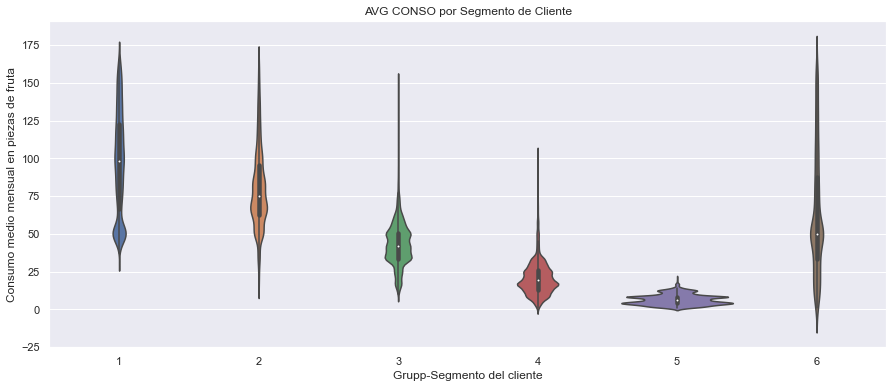

In [114]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=client_table['CLIENT_SEGMENT'], y=client_table['AVG CONSO'])
plt.title("AVG CONSO por Segmento de Cliente")
ax.set_xlabel("Grupp-Segmento del cliente")
ax.set_ylabel("Consumo medio mensual en piezas de fruta")
plt.show()

In [107]:
def describe_table(table_and_columns):
    """
    Esta función mostrará en pantalla la tabla descriptiva
    de la columna del dataset seleccionado
    """
    print(table_and_columns.describe())

<p>Como observamos, el segmento de los clientes esta claramente diferenciado por el consumo medio de fruta mensual: el segmento uno es el segmento que tiene un mayor consumo mensual medio, seguido del segmento 2, segmento 6, segmento 3, segmento 4 y segmento 5.</p>
<p>Se aprecia tambien que los segmentos 3, 4 y 5 tienen un consumo menos disperso que los segmentos 1, 2 y 6, siendo el segmento 6 el segmento con valores más dispersos.</p>

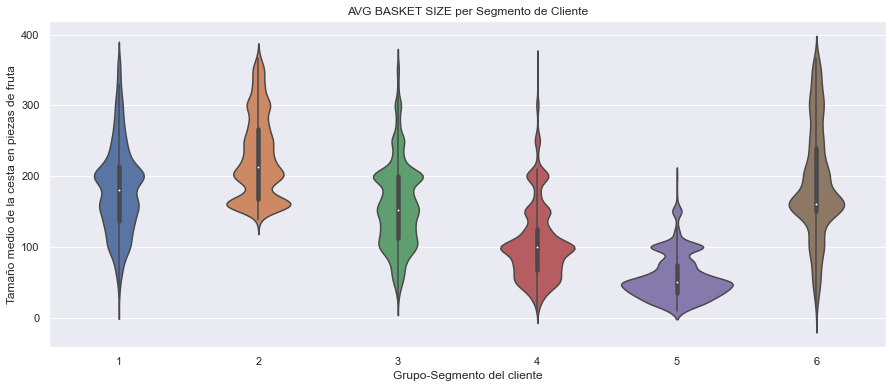

In [115]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=client_table['CLIENT_SEGMENT'], y=client_table['AVG BASKET SIZE'])
plt.title("AVG BASKET SIZE per Segmento de Cliente")
ax.set_xlabel("Grupo-Segmento del cliente")
ax.set_ylabel("Tamaño medio de la cesta en piezas de fruta")
plt.show()

<p>Se puede apreciar como el primer y sexto segmento son los segmentos que tienen los valores mas centrales, o los valores alrededor del valor promedio del AVG BASKET SIZE. Una vez diferenciados estos segmentos, observamos como hay una tendencia decreciente: el segmento 2 tiene un tamaño de la cesta mayor a las 200 piezas, el segmento 3, un tamaño de la cesta alrededor de las 150 piezas de fruta, el segmento 4 alrededor de 100, y el segmento 5 alrededor de 75 piezas.<br />La frecuencia de los datos será estudiado en cada segmento.</p>


<h5 id="s1" style="color: darkblue;">Segmento 1</h5>

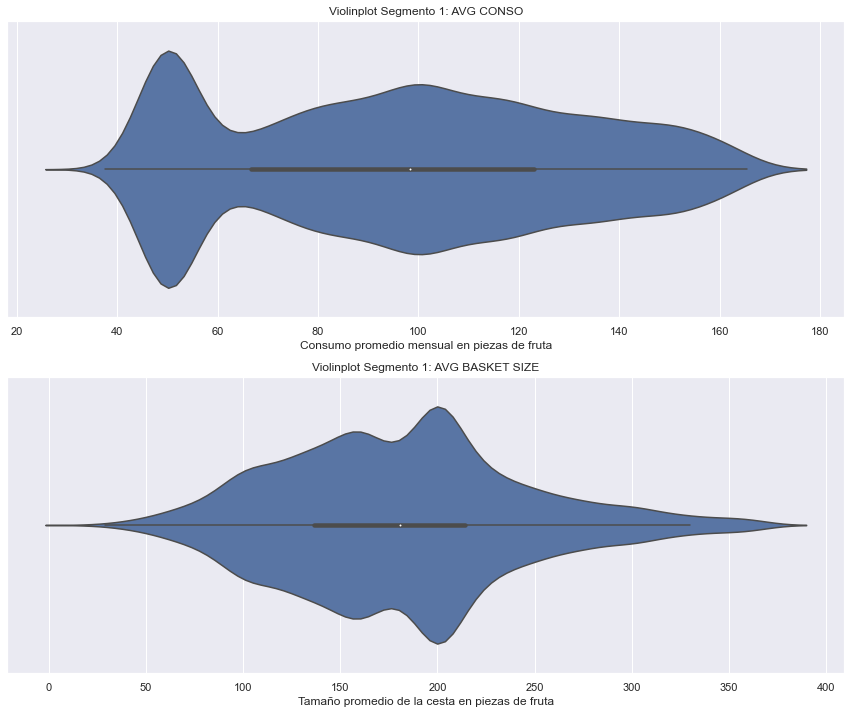

In [117]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg1['AVG CONSO'])
plt.title("Violinplot Segmento 1: AVG CONSO")
ax.set_xlabel("Consumo promedio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg1['AVG BASKET SIZE'])
plt.title("Violinplot Segmento 1: AVG BASKET SIZE")
ax.set_xlabel("Tamaño promedio de la cesta en piezas de fruta")
plt.show()

In [125]:
describe_table(seg1[['AVG CONSO', 'AVG BASKET SIZE']])
print("El consumo mas frecuente en {} piezas de fruta".format(mode(seg1['AVG CONSO'])))
print("El tamaño de la cesta mas frecuente es {} piezas de fruta".format(mode(seg1['AVG BASKET SIZE'])))

         AVG CONSO  AVG BASKET SIZE
count  6505.000000      6505.000000
mean     96.588764       180.851144
std      34.285969        62.102835
min      37.500000        19.550000
25%      66.670000       136.670000
50%      98.330000       180.700000
75%     123.080000       214.290000
max     165.420000       368.330000
El consumo mas frecuente en 50.0 piezas de fruta
El tamaño de la cesta mas frecuente es 200.0 piezas de fruta


<p>Como observamos, el primer segmento tiene un total de 6505 clientes, con un consumo medio mensual de 96 piezas de fruta, siendo 100 piezas de fruta el consumo más frecuente. A su vez, es un segmento que abarca el consumo des de 37 hasta 165 piezas de fruta, cuyo 50% de las observaciones se produce entre las 66 y 123 piezas de fruta.<br />Si nos fijamos en el tamaño de la cesta, el valor promedio es de 180 piezas de fruta, siendo 200 el tamaño de la cesta más frecuente. El tamaño de la cesta va des de las 20 piezas de fruta, hasta las 368, teniendo el 50% de los datos entre el 136 y el 214 en piezas de fruta el tamaño de la cesta.</p>

<h5 id="r-a-s1" style="color: darkblue;">Reglas de asociación segmento 1</h5>

In [129]:
from mlxtend.preprocessing import TransactionEncoder
fruitList_s1 = list(order_s1['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit_1 = a.fit(fruitList_s1).transform(fruitList_s1)
fruit_df1 = pd.DataFrame(a_fruit_1, columns=a.columns_)
fruit_df1 = fruit_df1.replace(False,0)
fruit_df1 = fruit_df1.replace(True,1)

In [131]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori_s1 = apriori(fruit_df1, min_support = 0.05, use_colnames = True)
fruit_apriori_s1 = fruit_apriori_s1.sort_values("support", ascending = False)
fruit_apriori_s1.head()

,support,itemsets
8,0.346288,(Kiwi)
15,0.309486,(Orange)
9,0.296954,(Lemon)
17,0.217322,(Pear)
4,0.210660,(Cheery)


In [137]:
fruit_ar_supp_s1 = association_rules(fruit_apriori_s1, metric="confidence", min_threshold = 0.05)
fruit_ar_supp_s1 = fruit_ar_supp_s1.sort_values(['support', 'lift'], ascending =[False, False])
fruit_ar_supp_s1.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kiwi),(Lemon),0.346288,0.296954,0.128331,0.370591,1.247973,0.025499,1.116993
1,(Lemon),(Kiwi),0.296954,0.346288,0.128331,0.432158,1.247973,0.025499,1.151222
2,(Orange),(Kiwi),0.309486,0.346288,0.112944,0.364941,1.053866,0.005773,1.029372
3,(Kiwi),(Orange),0.346288,0.309486,0.112944,0.326157,1.053866,0.005773,1.024740
4,(Grape),(Apple),0.166720,0.172747,0.107868,0.647003,3.745368,0.079068,2.343511
5,(Apple),(Grape),0.172747,0.166720,0.107868,0.624426,3.745368,0.079068,2.218686
6,(NuweFruit),(Nectarine),0.197970,0.205584,0.088357,0.446314,2.170960,0.047657,1.434778
7,(Nectarine),(NuweFruit),0.205584,0.197970,0.088357,0.429784,2.170960,0.047657,1.406538
8,(Kiwi),(Pear),0.346288,0.217322,0.087722,0.253321,1.165647,0.012466,1.048212
9,(Pear),(Kiwi),0.217322,0.346288,0.087722,0.403650,1.165647,0.012466,1.096188


In [138]:
fruit_ar_conf_s1 = association_rules(fruit_apriori_s1, metric="confidence", min_threshold = 0.05)
fruit_ar_conf_s1 = fruit_ar_conf_s1.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf_s1.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Grape),(Apple),0.166720,0.172747,0.107868,0.647003,3.745368,0.079068,2.343511
5,(Apple),(Grape),0.172747,0.166720,0.107868,0.624426,3.745368,0.079068,2.218686
55,(Strawberry),(Kiwi),0.095178,0.346288,0.052348,0.550000,1.588273,0.019389,1.452693
29,(Apricot),(Orange),0.127062,0.309486,0.066942,0.526841,1.702311,0.027618,1.459371
56,(Papaya),(Lemon),0.105330,0.296954,0.052348,0.496988,1.673618,0.021070,1.397672
50,(Coconut),(Cheery),0.126745,0.210660,0.058058,0.458073,2.174465,0.031358,1.456542
6,(NuweFruit),(Nectarine),0.197970,0.205584,0.088357,0.446314,2.170960,0.047657,1.434778
11,(NuweFruit),(Orange),0.197970,0.309486,0.087405,0.441506,1.426579,0.026136,1.236387
17,(Banana),(Kiwi),0.191466,0.346288,0.084391,0.440762,1.272820,0.018089,1.168934
1,(Lemon),(Kiwi),0.296954,0.346288,0.128331,0.432158,1.247973,0.025499,1.151222


<p>Como observamos, las combinaciones que mas aparecen en las ordenes de compra de los <b>clientes del primer segmento</b> son las siguientes:</p>
<ul>
    <li>Kiwi y limón (y viceversa)</li>
    <li>Naranja y kiwi (y viceversa)</li>
    <li>Uva y manzana (y viceversa)</li>
    <li>Nuwe fruit y nectarina (y viceversa)</li>
    <li>Kiwi y pera (y viceversa)</li>
</ul>
<p>Analizando la confianza, obtenemos que la que tiene una correlación y confianza mayor es la uva y la manzana. De los clientes que compran uvas, el 64% compran tambien manzanas. Con el resto de combinaciones:</p>
<ul>
    <li>El 55% de clientes que compran fresas, tambien compran kiwis, esta combinación aparece en el 10.78% del total de ordenes de compra.</li>
    <li>El 52.68% de clientes que compran albaricoques, compran tambien naranjas. Esta combinanción aparece en el 6.7% de las ordenes de compra.</li>
    <li>El 49.69% de clientes que compran papaya, compran también limones, y esta combinación aparece en el 5.2% de las ordenes de compra.</li>
    <li>El 45.8% de clientes que compran cocos, compran también cerezas, combinación que aparece en el 5.8% de las ordenes totales.</li>
    <li>El 44.6% de clientes que compran nuwe fruit compran tambien nectarinas, combinación que aparece en el 8.8% de las ordenes totales.</li>
    <li>El 44.15% de clientes que compran nuwe fruit compran tambien naranjas, combinación que aparece en el 8.7% de las ordenes totales.</li>
    <li>El 44% de clientes que compran platanos, compran tambien kiwis, combinación que aparece en el 8.4% de las ordenes totales.</li>
    <li>El 43.2% de clientes que compran limones, tambien compran kiwis, combinación que aparece en el 12% de las ordenes totales.</li>
</ul>

<h5 id="s2" style="color: darkblue;">Segmento 2</h5>

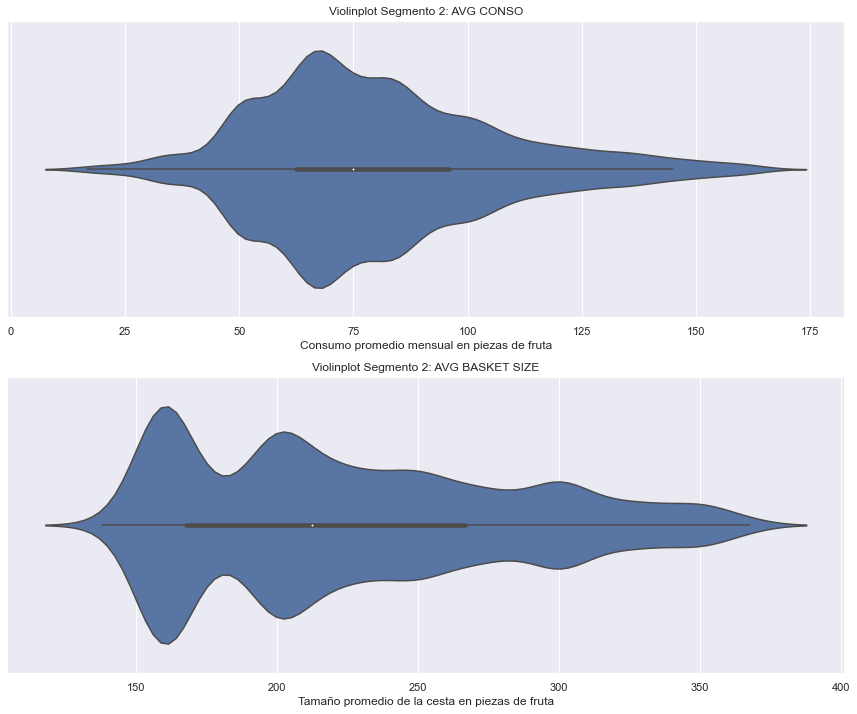

In [139]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg2['AVG CONSO'])
plt.title("Violinplot Segmento 2: AVG CONSO")
ax.set_xlabel("Consumo promedio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg2['AVG BASKET SIZE'])
plt.title("Violinplot Segmento 2: AVG BASKET SIZE")
ax.set_xlabel("Tamaño promedio de la cesta en piezas de fruta")
plt.show()

In [140]:
describe_table(seg2[['AVG CONSO', 'AVG BASKET SIZE']])
print("El consumo mas frecuente en {} piezas de fruta".format(mode(seg2['AVG CONSO'])))
print("El tamaño de la cesta mas frecuente es {} piezas de fruta".format(mode(seg2['AVG BASKET SIZE'])))

         AVG CONSO  AVG BASKET SIZE
count  6760.000000      6760.000000
mean     80.430648       226.169398
std      26.751299        58.436458
min      16.670000       138.000000
25%      62.500000       168.000000
50%      75.000000       212.500000
75%      95.830000       266.670000
max     165.000000       367.500000
El consumo mas frecuente en 66.67 piezas de fruta
El tamaño de la cesta mas frecuente es 160.0 piezas de fruta


<p>Como observamos, el segundo segmento tiene un total de 6760 clientes, con un consumo medio mensual de 80 piezas de fruta, siendo 67 piezas de fruta el consumo más frecuente. A su vez, es un segmento que abarca el consumo des de 16 hasta 165 piezas de fruta, cuyo 50% de las observaciones se produce entre las 62 y 95 piezas de fruta.<br />Si nos fijamos en el tamaño de la cesta, el valor promedio es de 226 piezas de fruta, siendo 160 el tamaño de la cesta más frecuente. El tamaño de la cesta va des de las 138 piezas de fruta, hasta las 367, teniendo el 50% de los datos entre el 168 y el 266 en piezas de fruta el tamaño de la cesta.</p>

<h5 id="r-a-s2" style="color: darkblue;">Reglas de asociación segmento 2</h5>

In [141]:
from mlxtend.preprocessing import TransactionEncoder
fruitList_s2 = list(order_s2['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit_2 = a.fit(fruitList_s2).transform(fruitList_s2)
fruit_df2 = pd.DataFrame(a_fruit_2, columns=a.columns_)
fruit_df2 = fruit_df2.replace(False,0)
fruit_df2 = fruit_df2.replace(True,1)

In [142]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori_s2 = apriori(fruit_df2, min_support = 0.05, use_colnames = True)
fruit_apriori_s2 = fruit_apriori_s2.sort_values("support", ascending = False)
fruit_apriori_s2.head()

,support,itemsets
8,0.402027,(Kiwi)
15,0.375676,(Orange)
9,0.346622,(Lemon)
4,0.275338,(Cheery)
17,0.255743,(Pear)


In [143]:
fruit_ar_supp_s2 = association_rules(fruit_apriori_s2, metric="confidence", min_threshold = 0.05)
fruit_ar_supp_s2 = fruit_ar_supp_s2.sort_values(['support', 'lift'], ascending =[False, False])
fruit_ar_supp_s2.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kiwi),(Lemon),0.402027,0.346622,0.177365,0.441176,1.272790,0.038014,1.169203
1,(Lemon),(Kiwi),0.346622,0.402027,0.177365,0.511696,1.272790,0.038014,1.224591
2,(Orange),(Kiwi),0.375676,0.402027,0.163851,0.436151,1.084880,0.012820,1.060520
3,(Kiwi),(Orange),0.402027,0.375676,0.163851,0.407563,1.084880,0.012820,1.053824
4,(Kiwi),(Cheery),0.402027,0.275338,0.130405,0.324370,1.178079,0.019712,1.072572
5,(Cheery),(Kiwi),0.275338,0.402027,0.130405,0.473620,1.178079,0.019712,1.136009
6,(Kiwi),(Banana),0.402027,0.227703,0.129054,0.321008,1.409770,0.037511,1.137418
7,(Banana),(Kiwi),0.227703,0.402027,0.129054,0.566766,1.409770,0.037511,1.380253
9,(NuweFruit),(Orange),0.242568,0.375676,0.127703,0.526462,1.401375,0.036576,1.318426
8,(Orange),(NuweFruit),0.375676,0.242568,0.127703,0.339928,1.401375,0.036576,1.147500


In [144]:
fruit_ar_conf_s2 = association_rules(fruit_apriori_s2, metric="confidence", min_threshold = 0.05)
fruit_ar_conf_s2 = fruit_ar_conf_s2.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf_s2.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
199,"(Kiwi, Apple)",(Grape),0.070608,0.163176,0.052703,0.746411,4.574282,0.041181,3.299930
190,"(Kiwi, Papaya)",(Lemon),0.075000,0.346622,0.053716,0.716216,2.066277,0.027720,2.302381
70,"(Banana, Lemon)",(Kiwi),0.102027,0.402027,0.072635,0.711921,1.770828,0.031618,2.075722
18,(Grape),(Apple),0.163176,0.169595,0.112500,0.689441,4.065230,0.084826,2.673905
238,"(Coconut, Pear)",(Cheery),0.073986,0.275338,0.050000,0.675799,2.454436,0.029629,2.235226
192,"(Papaya, Lemon)",(Kiwi),0.080405,0.402027,0.053716,0.668067,1.661747,0.021391,1.801488
198,"(Kiwi, Grape)",(Apple),0.079054,0.169595,0.052703,0.666667,3.930943,0.039296,2.491216
78,"(Orange, Banana)",(Kiwi),0.106419,0.402027,0.070946,0.666667,1.658263,0.028163,1.793919
19,(Apple),(Grape),0.169595,0.163176,0.112500,0.663347,4.065230,0.084826,2.485715
90,"(Orange, Nectarine)",(NuweFruit),0.105405,0.242568,0.068581,0.650641,2.682308,0.043013,2.168063


<p>Como observamos, las combinaciones que mas aparecen en las ordenes de compra de los <b>clientes del segundo segmento</b> son las siguientes:</p>
<ul>
    <li>Kiwi y limón (y viceversa) con un soporte del 17.7%</li>
    <li>Naranja y kiwi (y viceversa) con un soporte del 16.3%</li>
    <li>Kiwi y cereza (y viceversa) con un soporte del 13%</li>
    <li>Banana y kiwi (y viceversa) con un soporte del 12.9%</li>
    <li>Nuwe fruit y naranja (y viceversa) con un soporte del 12.7%</li>
</ul>
<p>Analizando la confianza, obtenemos que la que tiene una correlación y confianza mayor es la combinación entre el antecedente de (kiwi y manzana) con las uvas, con un soporte del 5.2%, de los clientes que compran kiwi y manzana, un 74.6% de ellos compraran uvas tambien. Obtenemos las siguientes combinaciones por orden de confianza:</p>
<ul>
    <li>El 71% de clientes que compran kiwi y papaya, tambien compran limones, esta combinación aparece en el 5.3% del total de ordenes de compra.</li>
    <li>El 71.2% de clientes que compran platanos y limones, compran tambien kiwis. Esta combinanción aparece en el 7.2% de las ordenes de compra.</li>
    <li>El 68.9% de clientes que compran uvas, compran también manzanas, y esta combinación aparece en el 11.2% de las ordenes de compra.</li>
    <li>El 67.5% de clientes que compran cocos y peras, compran también cerezas, combinación que aparece en el 5% de las ordenes totales.</li>
    <li>El 66.8% de clientes que compran papaya y limón compran tambien kiwi, combinación que aparece en el 5.3% de las ordenes totales.</li>
    <li>El 66.6% de clientes que compran kiwi y uva compran tambien manzana, combinación que aparece en el 5.2% de las ordenes totales.</li>
    <li>El 66.6% de clientes que compran platanos y naranjas, compran tambien kiwis, combinación que aparece en el 7% de las ordenes totales.</li>
    <li>El 65% de clientes que compran naranjas y nectarinas, tambien compran NuweFruit, combinación que aparece en el 6.8% de las ordenes totales.</li>
</ul>

<h5 id="s3" style="color: darkblue;">Segmento 3</h5>

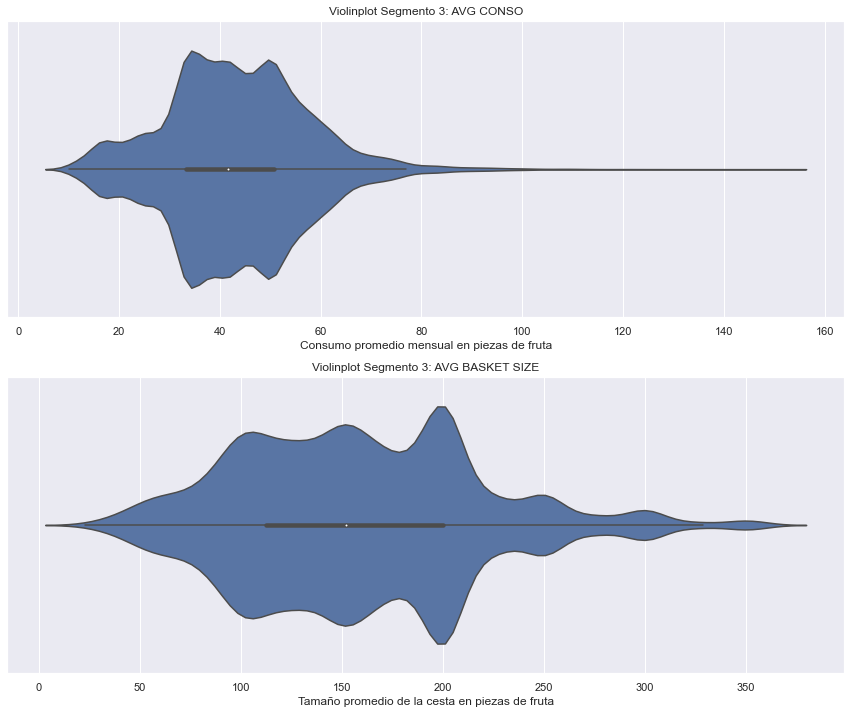

In [145]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg3['AVG CONSO'])
plt.title("Violinplot Segmento 3: AVG CONSO")
ax.set_xlabel("Consumo promedio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg3['AVG BASKET SIZE'])
plt.title("Violinplot Segmento 3: AVG BASKET SIZE")
ax.set_xlabel("Tamaño promedio de la cesta en piezas de fruta")
plt.show()

In [146]:
describe_table(seg3[['AVG CONSO', 'AVG BASKET SIZE']])
print("El consumo mas frecuente en {} piezas de fruta".format(mode(seg3['AVG CONSO'])))
print("El tamaño de la cesta mas frecuente es {} piezas de fruta".format(mode(seg3['AVG BASKET SIZE'])))

         AVG CONSO  AVG BASKET SIZE
count  8123.000000      8123.000000
mean     43.331350       158.475067
std      14.106411        59.834681
min      10.000000        23.080000
25%      33.330000       112.500000
50%      41.670000       152.000000
75%      50.830000       200.000000
max     151.670000       360.000000
El consumo mas frecuente en 33.33 piezas de fruta
El tamaño de la cesta mas frecuente es 200.0 piezas de fruta


<p>Como observamos, el tercer segmento tiene un total de 8123 clientes, con un consumo medio mensual de 43 piezas de fruta, siendo 33 piezas de fruta el consumo más frecuente. A su vez, es un segmento que abarca el consumo des de 10 hasta 151 piezas de fruta, cuyo 50% de las observaciones se produce entre las 33 y 50 piezas de fruta.<br />Si nos fijamos en el tamaño de la cesta, el valor promedio es de 158 piezas de fruta, siendo 200 el tamaño de la cesta más frecuente. El tamaño de la cesta va des de las 23 piezas de fruta, hasta las 360, teniendo el 50% de los datos entre el 112 y el 200 en piezas de fruta el tamaño de la cesta.</p>

<h5 id="r-a-s3" style="color: darkblue;">Reglas de asociación segmento 3</h5>

In [147]:
from mlxtend.preprocessing import TransactionEncoder
fruitList_s3 = list(order_s3['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit_3 = a.fit(fruitList_s3).transform(fruitList_s3)
fruit_df3 = pd.DataFrame(a_fruit_3, columns=a.columns_)
fruit_df3 = fruit_df3.replace(False,0)
fruit_df3 = fruit_df3.replace(True,1)

In [148]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori_s3 = apriori(fruit_df3, min_support = 0.05, use_colnames = True)
fruit_apriori_s3 = fruit_apriori_s3.sort_values("support", ascending = False)
fruit_apriori_s3.head()

,support,itemsets
9,0.332786,(Kiwi)
16,0.309270,(Orange)
10,0.267706,(Lemon)
4,0.231884,(Cheery)
0,0.222313,(Apple)


In [149]:
fruit_ar_supp_s3 = association_rules(fruit_apriori_s3, metric="confidence", min_threshold = 0.05)
fruit_ar_supp_s3 = fruit_ar_supp_s3.sort_values(['support', 'lift'], ascending =[False, False])
fruit_ar_supp_s3.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grape),(Apple),0.187312,0.222313,0.129888,0.693431,3.119159,0.088246,2.536740
1,(Apple),(Grape),0.222313,0.187312,0.129888,0.584256,3.119159,0.088246,1.954779
2,(Orange),(Kiwi),0.309270,0.332786,0.109926,0.355438,1.068065,0.007005,1.035142
3,(Kiwi),(Orange),0.332786,0.309270,0.109926,0.330320,1.068065,0.007005,1.031434
4,(Kiwi),(Lemon),0.332786,0.267706,0.109379,0.328677,1.227755,0.020290,1.090823
5,(Lemon),(Kiwi),0.267706,0.332786,0.109379,0.408580,1.227755,0.020290,1.128156
6,(NuweFruit),(Nectarine),0.214657,0.205633,0.098168,0.457325,2.223985,0.054027,1.463798
7,(Nectarine),(NuweFruit),0.205633,0.214657,0.098168,0.477394,2.223985,0.054027,1.502743
8,(Orange),(NuweFruit),0.309270,0.214657,0.095707,0.309461,1.441653,0.029320,1.137290
9,(NuweFruit),(Orange),0.214657,0.309270,0.095707,0.445860,1.441653,0.029320,1.246490


In [150]:
fruit_ar_conf_s3 = association_rules(fruit_apriori_s3, metric="confidence", min_threshold = 0.05)
fruit_ar_conf_s3 = fruit_ar_conf_s3.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf_s3.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grape),(Apple),0.187312,0.222313,0.129888,0.693431,3.119159,0.088246,2.536740
81,(Strawberry),(Kiwi),0.083128,0.332786,0.051135,0.615132,1.848427,0.023471,1.733615
70,"(Orange, Nectarine)",(NuweFruit),0.088324,0.214657,0.052502,0.594427,2.769198,0.033543,1.936381
1,(Apple),(Grape),0.222313,0.187312,0.129888,0.584256,3.119159,0.088246,1.954779
64,(Melon),(DevilFruit),0.091605,0.139185,0.053322,0.582090,4.182125,0.040572,2.059807
71,"(Orange, NuweFruit)",(Nectarine),0.095707,0.205633,0.052502,0.548571,2.667720,0.032822,1.759674
55,(Blueberry),(DevilFruit),0.106098,0.139185,0.057424,0.541237,3.888613,0.042657,1.876383
35,(Apricot),(Orange),0.126607,0.309270,0.068089,0.537797,1.738924,0.028933,1.494430
72,"(NuweFruit, Nectarine)",(Orange),0.098168,0.309270,0.052502,0.534819,1.729295,0.022142,1.484863
58,(Papaya),(Lemon),0.109106,0.267706,0.056604,0.518797,1.937937,0.027396,1.521799


<p>Como observamos, las combinaciones que mas aparecen en las ordenes de compra de los <b>clientes del tercer segmento</b> son las siguientes:</p>
<ul>
    <li>Uva y manzana (y viceversa) con un soporte del 13%</li>
    <li>Naranja y kiwi (y viceversa) con un soporte del 10.9%</li>
    <li>Kiwi y limon (y viceversa) con un soporte del 10.9%</li>
    <li>NuweFruit y nectarina (y viceversa) con un soporte del 9.8%</li>
    <li>Nuwe fruit y naranja (y viceversa) con un soporte del 9.5%</li>
</ul>
<p>Analizando la confianza, obtenemos que la que tiene una correlación y confianza mayor es la combinación entre las uvas y las manzanas, con un soporte del 12.98%, de los clientes que compran uvas, un 69% de ellos compraran manzanas tambien. Obtenemos las siguientes combinaciones por orden de confianza:</p>
<ul>
    <li>El 61.5% de clientes que compran fresas, tambien compran kiwis, esta combinación aparece en el 5.1% del total de ordenes de compra.</li>
    <li>El 59.4% de clientes que compran naranja y nectarinas, compran tambien NuweFruit. Esta combinanción aparece en el 5.2% de las ordenes de compra.</li>
    <li>El 58.2% de clientes que compran Melon, compran también DevilFruit, y esta combinación aparece en el 5.2% de las ordenes de compra.</li>
    <li>El 54.1% de clientes que compran Blueberry, compran también DevilFruit, combinación que aparece en el 5.7% de las ordenes totales.</li>
</ul>

<h5 id="s4" style="color: darkblue;">Segmento 4</h5>

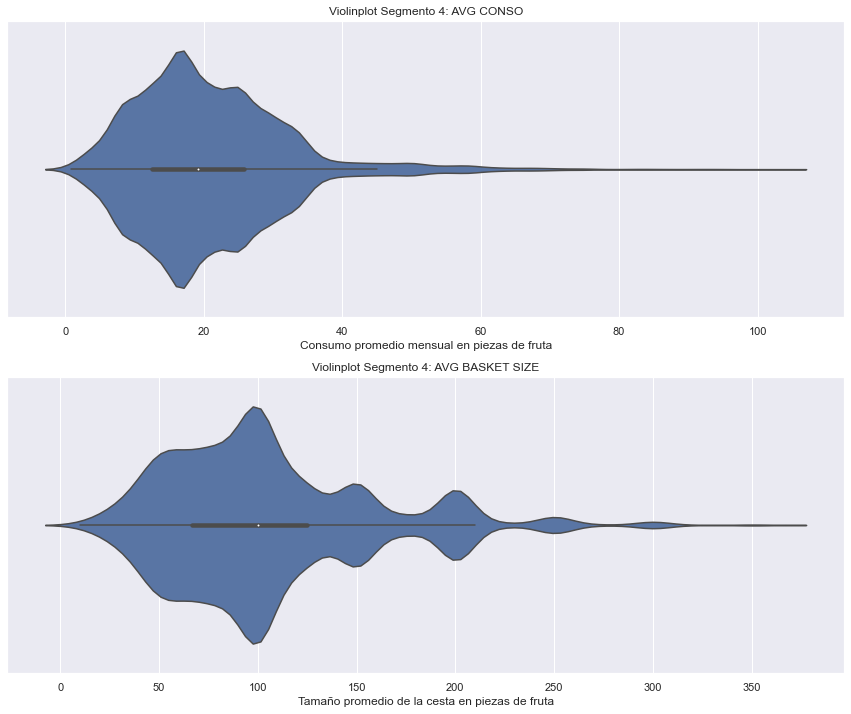

In [151]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg4['AVG CONSO'])
plt.title("Violinplot Segmento 4: AVG CONSO")
ax.set_xlabel("Consumo promedio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg4['AVG BASKET SIZE'])
plt.title("Violinplot Segmento 4: AVG BASKET SIZE")
ax.set_xlabel("Tamaño promedio de la cesta en piezas de fruta")
plt.show()

In [152]:
describe_table(seg4[['AVG CONSO', 'AVG BASKET SIZE']])
print("El consumo mas frecuente en {} piezas de fruta".format(mode(seg4['AVG CONSO'])))
print("El tamaño de la cesta mas frecuente es {} piezas de fruta".format(mode(seg4['AVG BASKET SIZE'])))

         AVG CONSO  AVG BASKET SIZE
count  7927.000000      7927.000000
mean     20.853290       105.043836
std      11.120393        52.986836
min       0.830000        10.000000
25%      12.580000        66.670000
50%      19.170000       100.000000
75%      25.830000       125.000000
max     103.330000       360.000000
El consumo mas frecuente en 16.67 piezas de fruta
El tamaño de la cesta mas frecuente es 100.0 piezas de fruta


<p>Como observamos, el tercer segmento tiene un total de 7927 clientes, con un consumo medio mensual de 20 piezas de fruta, siendo 16 piezas de fruta el consumo más frecuente. A su vez, es un segmento que abarca el consumo des de 0.8 hasta 103 piezas de fruta, cuyo 50% de las observaciones se produce entre las 12.5 y 25.8 piezas de fruta.<br />Si nos fijamos en el tamaño de la cesta, el valor promedio es de 105 piezas de fruta, siendo 100 el tamaño de la cesta más frecuente. El tamaño de la cesta va des de las 10 piezas de fruta, hasta las 360, teniendo el 50% de los datos entre el 66 y el 125 en piezas de fruta el tamaño de la cesta.</p>

<h5 id="r-a-s4" style="color: darkblue;">Reglas de asociación segmento 4</h5>

In [153]:
from mlxtend.preprocessing import TransactionEncoder
fruitList_s4 = list(order_s4['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit_4 = a.fit(fruitList_s4).transform(fruitList_s4)
fruit_df4 = pd.DataFrame(a_fruit_4, columns=a.columns_)
fruit_df4 = fruit_df4.replace(False,0)
fruit_df4 = fruit_df4.replace(True,1)

In [154]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori_s4 = apriori(fruit_df4, min_support = 0.05, use_colnames = True)
fruit_apriori_s4 = fruit_apriori_s4.sort_values("support", ascending = False)
fruit_apriori_s4.head()

,support,itemsets
8,0.297004,(Kiwi)
15,0.273122,(Orange)
9,0.243595,(Lemon)
0,0.232306,(Apple)
7,0.202345,(Grape)


In [155]:
fruit_ar_supp_s4 = association_rules(fruit_apriori_s4, metric="confidence", min_threshold = 0.05)
fruit_ar_supp_s4 = fruit_ar_supp_s4.sort_values(['support', 'lift'], ascending =[False, False])
fruit_ar_supp_s4.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grape),(Apple),0.202345,0.232306,0.130265,0.643777,2.771249,0.083259,2.155094
1,(Apple),(Grape),0.232306,0.202345,0.130265,0.560748,2.771249,0.083259,1.815939
2,(Kiwi),(Lemon),0.297004,0.243595,0.095093,0.320175,1.314374,0.022745,1.112647
3,(Lemon),(Kiwi),0.243595,0.297004,0.095093,0.390374,1.314374,0.022745,1.153160
5,(Kiwi),(Orange),0.297004,0.273122,0.092488,0.311404,1.140163,0.011370,1.055594
4,(Orange),(Kiwi),0.273122,0.297004,0.092488,0.338633,1.140163,0.011370,1.062944
6,(Orange),(NuweFruit),0.273122,0.199305,0.086409,0.316375,1.587390,0.031974,1.171249
7,(NuweFruit),(Orange),0.199305,0.273122,0.086409,0.433551,1.587390,0.031974,1.283219
8,(NuweFruit),(Nectarine),0.199305,0.169779,0.084238,0.422658,2.489466,0.050400,1.438006
9,(Nectarine),(NuweFruit),0.169779,0.199305,0.084238,0.496164,2.489466,0.050400,1.589196


In [156]:
fruit_ar_conf_s4 = association_rules(fruit_apriori_s4, metric="confidence", min_threshold = 0.05)
fruit_ar_conf_s4 = fruit_ar_conf_s4.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf_s4.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grape),(Apple),0.202345,0.232306,0.130265,0.643777,2.771249,0.083259,2.155094
1,(Apple),(Grape),0.232306,0.202345,0.130265,0.560748,2.771249,0.083259,1.815939
15,(Apricot),(Orange),0.126791,0.273122,0.070777,0.558219,2.043845,0.036148,1.645336
9,(Nectarine),(NuweFruit),0.169779,0.199305,0.084238,0.496164,2.489466,0.050400,1.589196
48,(Papaya),(Lemon),0.108554,0.243595,0.053409,0.492000,2.019743,0.026965,1.488986
42,(Plum),(Mango),0.115067,0.119409,0.055145,0.479245,4.013461,0.041405,1.690989
45,(Plum),(DevilFruit),0.115067,0.145462,0.054711,0.475472,3.268691,0.037973,1.629154
33,(Blueberry),(DevilFruit),0.125054,0.145462,0.058619,0.468750,3.222481,0.040428,1.608541
43,(Mango),(Plum),0.119409,0.115067,0.055145,0.461818,4.013461,0.041405,1.644301
11,(Banana),(Kiwi),0.168476,0.297004,0.073817,0.438144,1.475214,0.023779,1.251204


<p>Como observamos, las combinaciones que mas aparecen en las ordenes de compra de los <b>clientes del cuarto segmento</b> son las siguientes:</p>
<ul>
    <li>Uva y manzana (y viceversa) con un soporte del 13%</li>
    <li>Kiwi y limón (y viceversa) con un soporte del 9.5%</li>
    <li>Kiwi y naranja (y viceversa) con un soporte del 9.2%</li>
    <li>NuweFruit y nectarina (y viceversa) con un soporte del 8.4%</li>
    <li>Nuwe fruit y naranja (y viceversa) con un soporte del 8.6%</li>
</ul>
<p>Analizando la confianza, obtenemos que la que tiene una correlación y confianza mayor es la combinación entre las uvas y las manzanas, con un soporte del 13.02%, de los clientes que compran uvas, un 64% de ellos compraran manzanas tambien. Obtenemos las siguientes combinaciones por orden de confianza:</p>
<ul>
    <li>El 55.8% de clientes que compran albaricoques, tambien compran naranjas, esta combinación aparece en el 7% del total de ordenes de compra.</li>
    <li>El 49.6% de clientes que compran nectarinas, compran tambien NuweFruit. Esta combinanción aparece en el 8.4% de las ordenes de compra.</li>
    <li>El 49.2% de clientes que compran papaya, compran también limón, y esta combinación aparece en el 5.3% de las ordenes de compra.</li>
    <li>El 47.9% de clientes que compran ciruelas, compran también mango, combinación que aparece en el 5.5% de las ordenes totales.</li>
    <li>El 47.5% de clientes que compran ciruelas, compran también DevilFruit, combinación que aparece en el 5.4% de las ordenes totales.</li>
    <li>El 46.8% de clientes que compran Blueberry, compran también DevilFruit, combinación que aparece en el 5.8% de las ordenes totales.</li>
</ul>

<h5 id="s5" style="color: darkblue;">Segmento 5</h5>

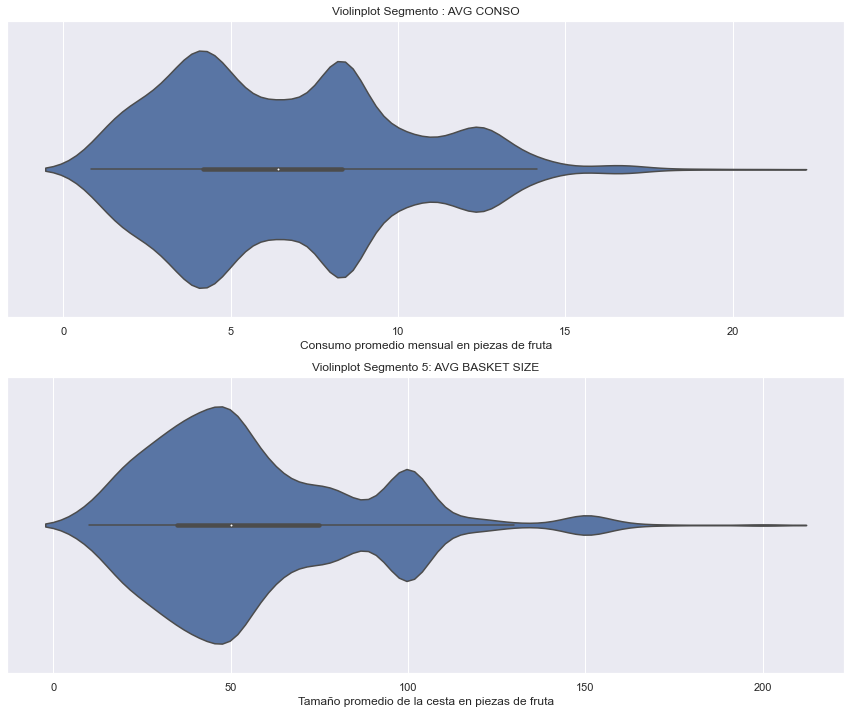

In [157]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg5['AVG CONSO'])
plt.title("Violinplot Segmento : AVG CONSO")
ax.set_xlabel("Consumo promedio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg5['AVG BASKET SIZE'])
plt.title("Violinplot Segmento 5: AVG BASKET SIZE")
ax.set_xlabel("Tamaño promedio de la cesta en piezas de fruta")
plt.show()

In [158]:
describe_table(seg5[['AVG CONSO', 'AVG BASKET SIZE']])
print("El consumo mas frecuente en {} piezas de fruta".format(mode(seg5['AVG CONSO'])))
print("El tamaño de la cesta mas frecuente es {} piezas de fruta".format(mode(seg5['AVG BASKET SIZE'])))

         AVG CONSO  AVG BASKET SIZE
count  3429.000000      3429.000000
mean      6.600367        56.872805
std       3.480204        31.189515
min       0.830000        10.000000
25%       4.170000        35.000000
50%       6.420000        50.000000
75%       8.330000        75.000000
max      20.830000       200.000000
El consumo mas frecuente en 8.33 piezas de fruta
El tamaño de la cesta mas frecuente es 50.0 piezas de fruta


<p>Como observamos, el tercer segmento tiene un total de 3429 clientes, con un consumo medio mensual de 6.6 piezas de fruta, siendo 8.33 piezas de fruta el consumo más frecuente. A su vez, es un segmento que abarca el consumo des de 0.83 hasta 20 piezas de fruta, cuyo 50% de las observaciones se produce entre las 4 y 8 piezas de fruta.<br />Si nos fijamos en el tamaño de la cesta, el valor promedio es de 57 piezas de fruta, siendo 50 el tamaño de la cesta más frecuente. El tamaño de la cesta va des de las 10 piezas de fruta, hasta las 200, teniendo el 50% de los datos entre el 35 y el 75 en piezas de fruta el tamaño de la cesta.</p>

<h5 id="r-a-s5" style="color: darkblue;">Reglas de asociación segmento 5</h5>

In [159]:
from mlxtend.preprocessing import TransactionEncoder
fruitList_s5 = list(order_s5['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit_5 = a.fit(fruitList_s5).transform(fruitList_s5)
fruit_df5 = pd.DataFrame(a_fruit_5, columns=a.columns_)
fruit_df5 = fruit_df5.replace(False,0)
fruit_df5 = fruit_df5.replace(True,1)

In [160]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori_s5 = apriori(fruit_df5, min_support = 0.05, use_colnames = True)
fruit_apriori_s5 = fruit_apriori_s5.sort_values("support", ascending = False)
fruit_apriori_s5.head()

,support,itemsets
0,0.253076,(Apple)
16,0.230228,(Orange)
7,0.228471,(Grape)
9,0.224956,(Kiwi)
10,0.210896,(Lemon)


In [161]:
fruit_ar_supp_s5 = association_rules(fruit_apriori_s5, metric="confidence", min_threshold = 0.05)
fruit_ar_supp_s5 = fruit_ar_supp_s5.sort_values(['support', 'lift'], ascending =[False, False])
fruit_ar_supp_s5.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grape),(Apple),0.228471,0.253076,0.168717,0.738462,2.917949,0.110897,2.855888
1,(Apple),(Grape),0.253076,0.228471,0.168717,0.666667,2.917949,0.110897,2.314587
2,(Kiwi),(Lemon),0.224956,0.210896,0.072056,0.320312,1.518815,0.024614,1.160980
3,(Lemon),(Kiwi),0.210896,0.224956,0.072056,0.341667,1.518815,0.024614,1.177282
5,(NuweFruit),(Orange),0.149385,0.230228,0.068541,0.458824,1.992905,0.034149,1.422404
4,(Orange),(NuweFruit),0.230228,0.149385,0.068541,0.297710,1.992905,0.034149,1.211202
6,(NuweFruit),(Nectarine),0.149385,0.147627,0.065026,0.435294,2.948599,0.042973,1.509410
7,(Nectarine),(NuweFruit),0.147627,0.149385,0.065026,0.440476,2.948599,0.042973,1.520248
12,(Pineapple),(Watermelon),0.107206,0.131810,0.054482,0.508197,3.855519,0.040351,1.765319
13,(Watermelon),(Pineapple),0.131810,0.107206,0.054482,0.413333,3.855519,0.040351,1.521809


In [162]:
fruit_ar_conf_s5 = association_rules(fruit_apriori_s5, metric="confidence", min_threshold = 0.05)
fruit_ar_conf_s5 = fruit_ar_conf_s5.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf_s5.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Grape),(Apple),0.228471,0.253076,0.168717,0.738462,2.917949,0.110897,2.855888
9,(Apricot),(Orange),0.080844,0.230228,0.054482,0.673913,2.927149,0.035869,2.360633
1,(Apple),(Grape),0.253076,0.228471,0.168717,0.666667,2.917949,0.110897,2.314587
12,(Pineapple),(Watermelon),0.107206,0.131810,0.054482,0.508197,3.855519,0.040351,1.765319
11,(Mango),(Plum),0.112478,0.144112,0.054482,0.484375,3.361090,0.038272,1.659903
5,(NuweFruit),(Orange),0.149385,0.230228,0.068541,0.458824,1.992905,0.034149,1.422404
7,(Nectarine),(NuweFruit),0.147627,0.149385,0.065026,0.440476,2.948599,0.042973,1.520248
6,(NuweFruit),(Nectarine),0.149385,0.147627,0.065026,0.435294,2.948599,0.042973,1.509410
13,(Watermelon),(Pineapple),0.131810,0.107206,0.054482,0.413333,3.855519,0.040351,1.521809
16,(Banana),(Lemon),0.131810,0.210896,0.052724,0.400000,1.896667,0.024926,1.315173


<p>Como observamos, las combinaciones que mas aparecen en las ordenes de compra de los <b>clientes del quinto segmento</b> son las siguientes:</p>
<ul>
    <li>Uva y manzana (y viceversa) con un soporte del 17%</li>
    <li>Kiwi y limon (y viceversa) con un soporte del 7.2%</li>
    <li>NuweFruit y nectarina (y viceversa) con un soporte del 6.5%</li>
    <li>Nuwe fruit y naranja (y viceversa) con un soporte del 6.8%</li>
    <li>Sandía y piña (y viceversa) con un soporte del 5.4%</li>
</ul>
<p>Analizando la confianza, obtenemos que la que tiene una correlación y confianza mayor es la combinación entre las uvas y las manzanas, con un soporte del 16.8%, de los clientes que compran uvas, un 73% de ellos compraran manzanas tambien. Obtenemos las siguientes combinaciones por orden de confianza:</p>
<ul>
    <li>El 67.4% de clientes que compran albaricoques, tambien compran naranjas, esta combinación aparece en el 5.4% del total de ordenes de compra.</li>
    <li>El 50.8% de clientes que compran piña, compran tambien sandía. Esta combinanción aparece en el 5.4% de las ordenes de compra.</li>
    <li>El 48.4% de clientes que compran mango, compran tambien ciruelas. Esta combinanción aparece en el 5.4% de las ordenes de compra.</li>
</ul>

<h5 id="s6" style="color: darkblue;">Segmento 6</h5>

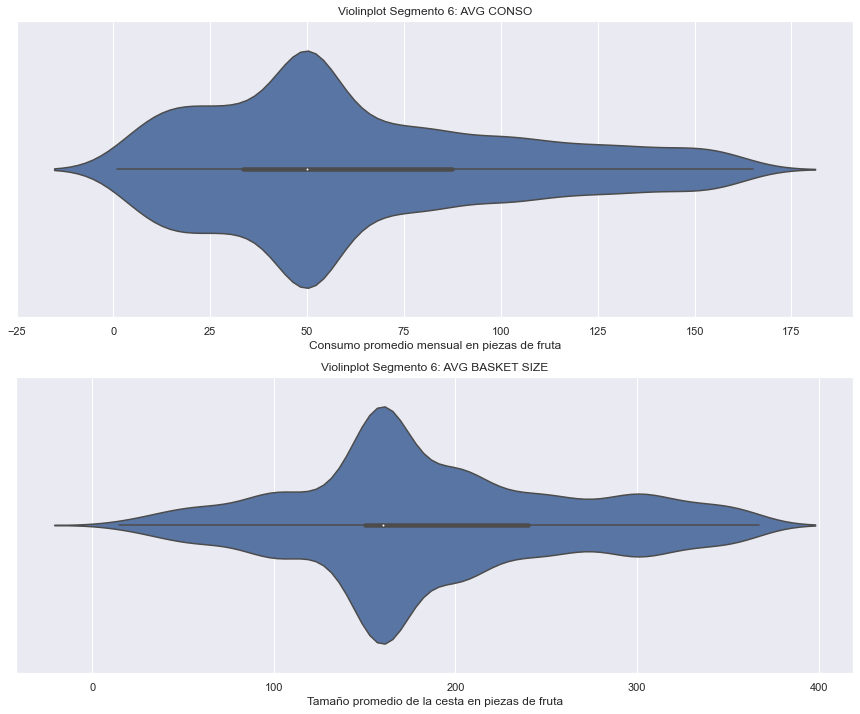

In [163]:
plt.figure(1, figsize=(15, 12))
plt.subplot(211)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg6['AVG CONSO'])
plt.title("Violinplot Segmento 6: AVG CONSO")
ax.set_xlabel("Consumo promedio mensual en piezas de fruta")
plt.subplot(212)
sns.set_theme(style="darkgrid")
ax = sns.violinplot(x=seg6['AVG BASKET SIZE'])
plt.title("Violinplot Segmento 6: AVG BASKET SIZE")
ax.set_xlabel("Tamaño promedio de la cesta en piezas de fruta")
plt.show()

In [164]:
describe_table(seg6[['AVG CONSO', 'AVG BASKET SIZE']])
print("El consumo mas frecuente en {} piezas de fruta".format(mode(seg6['AVG CONSO'])))
print("El tamaño de la cesta mas frecuente es {} piezas de fruta".format(mode(seg6['AVG BASKET SIZE'])))

        AVG CONSO  AVG BASKET SIZE
count  3140.00000      3140.000000
mean     63.24779       189.701210
std      40.30241        77.362672
min       0.83000        10.000000
25%      33.33000       150.000000
50%      50.00000       160.000000
75%      87.50000       240.000000
max     165.00000       367.140000
El consumo mas frecuente en 50.0 piezas de fruta
El tamaño de la cesta mas frecuente es 160.0 piezas de fruta


<p>Como observamos, el tercer segmento tiene un total de 3140 clientes, con un consumo medio mensual de 63 piezas de fruta, siendo 50 piezas de fruta el consumo más frecuente. A su vez, es un segmento que abarca el consumo des de 0.83 hasta 165 piezas de fruta, cuyo 50% de las observaciones se produce entre las 33 y 87 piezas de fruta.<br />Si nos fijamos en el tamaño de la cesta, el valor promedio es de 189 piezas de fruta, siendo 160 el tamaño de la cesta más frecuente. El tamaño de la cesta va des de las 10 piezas de fruta, hasta las 367, teniendo el 50% de los datos entre el 150 y el 240 en piezas de fruta el tamaño de la cesta.</p>

<h5 id="r-a-s6" style="color: darkblue;">Reglas de asociación segmento 6</h5>

In [165]:
from mlxtend.preprocessing import TransactionEncoder
fruitList_s6 = list(order_s6['FRUIT_PRODUCT'].map(lambda x: x.replace(" ","")).apply(lambda x:x.split(",")))
a = TransactionEncoder()
a_fruit_6 = a.fit(fruitList_s6).transform(fruitList_s6)
fruit_df6 = pd.DataFrame(a_fruit_6, columns=a.columns_)
fruit_df6 = fruit_df6.replace(False,0)
fruit_df6 = fruit_df6.replace(True,1)

In [166]:
from mlxtend.frequent_patterns import apriori, association_rules

fruit_apriori_s6 = apriori(fruit_df6, min_support = 0.05, use_colnames = True)
fruit_apriori_s6 = fruit_apriori_s6.sort_values("support", ascending = False)
fruit_apriori_s6.head()

,support,itemsets
9,0.388051,(Kiwi)
10,0.342185,(Lemon)
4,0.314424,(Cheery)
16,0.313217,(Orange)
18,0.250453,(Pear)


In [167]:
fruit_ar_supp_s6 = association_rules(fruit_apriori_s6, metric="confidence", min_threshold = 0.05)
fruit_ar_supp_s6 = fruit_ar_supp_s6.sort_values(['support', 'lift'], ascending =[False, False])
fruit_ar_supp_s6.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kiwi),(Lemon),0.388051,0.342185,0.156910,0.404355,1.181685,0.024125,1.104374
1,(Lemon),(Kiwi),0.342185,0.388051,0.156910,0.458554,1.181685,0.024125,1.130213
2,(Orange),(Kiwi),0.313217,0.388051,0.147858,0.472062,1.216495,0.026314,1.159130
3,(Kiwi),(Orange),0.388051,0.313217,0.147858,0.381026,1.216495,0.026314,1.109552
4,(Kiwi),(Cheery),0.388051,0.314424,0.132770,0.342146,1.088169,0.010758,1.042141
5,(Cheery),(Kiwi),0.314424,0.388051,0.132770,0.422265,1.088169,0.010758,1.059221
7,(Lemon),(Orange),0.342185,0.313217,0.123114,0.359788,1.148688,0.015936,1.072744
6,(Orange),(Lemon),0.313217,0.342185,0.123114,0.393064,1.148688,0.015936,1.083829
9,(Apple),(Grape),0.181050,0.165963,0.118890,0.656667,3.956715,0.088842,2.429235
8,(Grape),(Apple),0.165963,0.181050,0.118890,0.716364,3.956715,0.088842,2.887323


In [168]:
fruit_ar_conf_s6 = association_rules(fruit_apriori_s6, metric="confidence", min_threshold = 0.05)
fruit_ar_conf_s6 = fruit_ar_conf_s6.sort_values(['confidence', 'lift'], ascending =[False, False])
fruit_ar_conf_s6.head(n=10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
144,"(Kiwi, Grape)",(Apple),0.071213,0.181050,0.052505,0.737288,4.072288,0.039611,3.117293
145,"(Kiwi, Apple)",(Grape),0.073024,0.165963,0.052505,0.719008,4.332352,0.040385,2.968192
8,(Grape),(Apple),0.165963,0.181050,0.118890,0.716364,3.956715,0.088842,2.887323
84,"(Banana, Lemon)",(Kiwi),0.091732,0.388051,0.062764,0.684211,1.763199,0.027167,1.937839
9,(Apple),(Grape),0.181050,0.165963,0.118890,0.656667,3.956715,0.088842,2.429235
53,(Apricot),(Orange),0.114665,0.313217,0.073627,0.642105,2.050035,0.037712,1.918953
106,"(Orange, Banana)",(Kiwi),0.088111,0.388051,0.055522,0.630137,1.623852,0.021330,1.654530
140,"(NuweFruit, Kiwi)",(Orange),0.084490,0.313217,0.052505,0.621429,1.984021,0.026041,1.814145
92,"(Orange, Pear)",(Kiwi),0.097164,0.388051,0.060350,0.621118,1.600610,0.022646,1.615145
91,(Strawberry),(Kiwi),0.098974,0.388051,0.060350,0.609756,1.571331,0.021943,1.568120


<p>Como observamos, las combinaciones que mas aparecen en las ordenes de compra de los <b>clientes del sexto segmento</b> son las siguientes:</p>
<ul>
    <li>Kiwi y limón (y viceversa) con un soporte del 15.69% y una confianza del 40.4% (el 40% de clientes que compran kiwis también compran limones)(viceversa 45.8%)</li>
    <li>Naranja y kiwi (y viceversa) con un soporte del 14.7% y una confianza del 47.2% (viceversa 38%)</li>
    <li>Kiwi y cereza (y viceversa) con un soporte del 13.2% y una confianza del 34.2% (viceversa 42%)</li>
    <li>Limón y naranja (y viceversa) con un soporte del 12.3% y una confianza del 35.9% (viceversa 39.3%)</li>
    <li>Uva y manzana (y viceversa) con un soporte del 11.8% y una confianza del 71% (viceversa 65.6%)</li>
</ul>
<p>Analizando la confianza, obtenemos que la que tiene una correlación y confianza mayor es la combinación entre los kiwis y las uvas, y las manzanas, con un soporte del 5.25%%, de los clientes que compran kiwis i uvas, un 73% de ellos compraran manzanas tambien. Obtenemos las siguientes combinaciones por orden de confianza: (analizamos del top 10 que no sean combinación).</p>
<ul>
    <li>El 68.4% de clientes que compran platanos y limones, tambien compran kiwis, esta combinación aparece en el 6.2% del total de ordenes de compra.</li>
    <li>El 64.2% de clientes que compran albaricoques compran tambien naranjas. Esta combinanción aparece en el 7.3% de las ordenes de compra.</li>
    <li>El 62.1% de clientes que compran nuwefruit y kiwi, compran también naranja, y esta combinación aparece en el 5.2% de las ordenes de compra.</li>
    <li>El 62.1 de clientes que compran naranjas y peras, compran también kiwis, combinación que aparece en el 6% de las ordenes totales.</li>
    <li>El 60.9% de clientes que compran fresas, compran también kiwis, combinación que aparece en el 6% de las ordenes totales.</li>
</ul>

<h5 id="consumo-segmento" style="color: darkblue;">¿Qué diferencia de consumo hay entre segmentos?</h5>

En el consumo de fruta individual, de acuerdo con el soporte obtenido, todos los segmentos, exceptuando el Segmento 5, las frutas que más aparecen en las ordenes de compra son (TOP3):
<ul>
    <li>Kiwi - [22,5% - 40,2%]</li>
    <li>Orange - [23% - 37,5%]</li>
    <li>Lemon - [21% - 34,6%]</li>
</ul>
Estas frutas aparecen en los 3 primeros puestos en 5 de los 6 segmentos, el segmento diferenciado es el Segmento 5, con un TOP3 compuesto por el 25.3% de soporte en las manzanas, un 23% de soporte en las naranjas, y un 23% de soporte en las uvas.

Existe diferencia entre soportes, hay segmentos que se decantan más en comprar estas 3 frutas (+40% del soporte), o segmentos que diversifican su cesta de la compra (-30% del soporte).

Tambien hay que tener en cuenta las reglas de asociación, el Segmento 1 en el 12.8% de ordenes de compra aparecen kiwis y limónes (puesto 1), en el Segmento 2, en el 17.7% (puesto 1), en el Segmento 3, en el 11% (puesto 3), en el Segmento 4, el 9.5% (puesto 2), en el Segmento 5, no supera el 8% de soporte, y en el Segmento 6, el 15.7% (puesto 1).<br />El relación a la combinación entre kiwis y naranjas, observamos que esta en el segundo puesto (por soporte) en aparición en las ordenes de compra, pero tiene mayor peso en los segmentos 2 y 6 - [14,8% - 16,4%].<br />Los segmentos 3, 4, 5 se diferencian por el consumo conjunto de uvas y manzanas, siendo el Segmento 5 el predominante, con un soporte del 17%; el Segmento 5 se podría caracterizar por los clientes que tienden a comprar uvas y manzanas mayoritariamente (como hemos dicho, las otras combinaciones no tienen un buen soporte), y esto lo corrobora la lista de frutas predominantes en este segmento, estando las manzanas y las uvas en 1r y 3r puesto.<br />

<h5 id="mas-ordenes" style="color: darkblue;">¿Qué segmento hace más ordenes de compra?</h5>

In [175]:
orders1 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 1]
orders2 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 2]
orders3 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 3]
orders4 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 4]
orders5 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 5]
orders6 = fruit_per_order[fruit_per_order['CLIENT_SEGMENT'] == 6]

In [210]:
def order_segment(table_column, n):   
    suma = 0
    for i in table_column:
        suma += 1
    print("El segmento {} ha hecho un total de {} ordenes".format(n,suma))

In [212]:
order_segment(orders1['ORDER ID'], 1)
order_segment(orders2['ORDER ID'], 2)
order_segment(orders3['ORDER ID'], 3)
order_segment(orders4['ORDER ID'], 4)
order_segment(orders5['ORDER ID'], 5)
order_segment(orders6['ORDER ID'], 6)

El segment 1 ha hecho un total de 6304 ordenes
El segment 2 ha hecho un total de 2960 ordenes
El segment 3 ha hecho un total de 3657 ordenes
El segment 4 ha hecho un total de 2303 ordenes
El segment 5 ha hecho un total de 569 ordenes
El segment 6 ha hecho un total de 1657 ordenes


In [217]:
print("El segmento 1 tiene",round(6304/len(seg1), 2),"ordenes por cápita")
print("El segmento 2 tiene",round(2960/len(seg2), 2),"ordenes por cápita")
print("El segmento 3 tiene",round(3657/len(seg3), 2),"ordenes por cápita")
print("El segmento 4 tiene",round(2303/len(seg4), 2),"ordenes por cápita")
print("El segmento 5 tiene",round(569/len(seg5), 2),"ordenes por cápita")
print("El segmento 6 tiene",round(1657/len(seg6), 2),"ordenes por cápita")

El segmento 1 tiene 0.97 ordenes por cápita
El segmento 2 tiene 0.44 ordenes por cápita
El segmento 3 tiene 0.45 ordenes por cápita
El segmento 4 tiene 0.29 ordenes por cápita
El segmento 5 tiene 0.17 ordenes por cápita
El segmento 6 tiene 0.53 ordenes por cápita


Podemos observar que las ordenes también son diferenciales entre segmentos, tanto en valor absoluto, como relativo.

<h5 id="mas-devo" style="color: darkblue;">¿Qué segmento devuelve más pedidos?</h5>

In [218]:
merged_order_segment = pd.merge(order_table, client_id_segment)
merged_order_segment.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT,CLIENT_SEGMENT
0,18073169,3,675518868,Kiwi,6
1,18073169,4,675518868,Lemon,6
2,18073169,7,675518868,Cheery,6
3,18073169,8,675518868,Nuwe Fruit,6
4,18073169,3,675518868,Kiwi,6


In [219]:
returnBySegment = merged_order_segment[merged_order_segment['NB PRODS'] < 0]

In [220]:
returnBySegment.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT,CLIENT_SEGMENT
145,18090840,-40,667141810,Nectarine,2
361,18115855,-5,675226512,Lime,3
2149,18362804,-2,671274916,Apple,4
3083,18489723,-20,665673010,Coconut,2
4284,18633239,-2,668939456,Banana,3


In [221]:
return1 = returnBySegment[returnBySegment['CLIENT_SEGMENT'] == 1]
return2 = returnBySegment[returnBySegment['CLIENT_SEGMENT'] == 2]
return3 = returnBySegment[returnBySegment['CLIENT_SEGMENT'] == 3]
return4 = returnBySegment[returnBySegment['CLIENT_SEGMENT'] == 4]
return5 = returnBySegment[returnBySegment['CLIENT_SEGMENT'] == 5]
return6 = returnBySegment[returnBySegment['CLIENT_SEGMENT'] == 6]

In [222]:
def returned_segment(table_column, n):   
    suma = 0
    for i in table_column:
        suma += i
    print("El segmento {} ha devuelto el total de {} prods.".format(n,suma))

In [224]:
returned_segment(return1['NB PRODS'], 1)
returned_segment(return2['NB PRODS'], 2)
returned_segment(return3['NB PRODS'], 3)
returned_segment(return4['NB PRODS'], 4)
returned_segment(return5['NB PRODS'], 5)
returned_segment(return6['NB PRODS'], 6)

El segmento 1 ha devuelto el total de -596 prods.
El segmento 2 ha devuelto el total de -584 prods.
El segmento 3 ha devuelto el total de -351 prods.
El segmento 4 ha devuelto el total de -130 prods.
El segmento 5 ha devuelto el total de -15 prods.
El segmento 6 ha devuelto el total de -586 prods.


Como observamos, el segmento del cliente también afecta a las devoluciones, tiene lógica que el segmento que más ordenes cree, más prods devuelva, pero en cambio, el segmento 2, 3, y 6 devuelven en proporcion más prods que el segmento 1, 4 y 5.

<h2 id="estudio-promocion" style="text-align: center; color: darkblue;">Estudio de la promoción y su efecto</h2>

In [235]:
client_promotion = client_table[client_table['RECEIVED_COMMUNICATION'] == 1]
print("El porcentaje total de clientes que han recibido comunicación es del:", round(len(client_promotion)/len(client_table)*100, 2), "%")

El porcentaje total de clientes que han recibido comunicación es del: 50.8 %


In [236]:
client_no_promotion = client_table[client_table['RECEIVED_COMMUNICATION'] == 0]
print("El porcentaje total de clientes que no han recibido comunicación es del:", round(len(client_no_promotion)/len(client_table)*100, 2), "%")

El porcentaje total de clientes que no han recibido comunicación es del: 49.2 %


In [231]:
client_promotion1 = client_promotion[client_promotion['CLIENT_SEGMENT'] == 1]
client_promotion2 = client_promotion[client_promotion['CLIENT_SEGMENT'] == 2]
client_promotion3 = client_promotion[client_promotion['CLIENT_SEGMENT'] == 3]
client_promotion4 = client_promotion[client_promotion['CLIENT_SEGMENT'] == 4]
client_promotion5 = client_promotion[client_promotion['CLIENT_SEGMENT'] == 5]
client_promotion6 = client_promotion[client_promotion['CLIENT_SEGMENT'] == 6]

In [237]:
client_no_promotion1 = client_no_promotion[client_no_promotion['CLIENT_SEGMENT'] == 1]
client_no_promotion2 = client_no_promotion[client_no_promotion['CLIENT_SEGMENT'] == 2]
client_no_promotion3 = client_no_promotion[client_no_promotion['CLIENT_SEGMENT'] == 3]
client_no_promotion4 = client_no_promotion[client_no_promotion['CLIENT_SEGMENT'] == 4]
client_no_promotion5 = client_no_promotion[client_no_promotion['CLIENT_SEGMENT'] == 5]
client_no_promotion6 = client_no_promotion[client_no_promotion['CLIENT_SEGMENT'] == 6]

In [245]:
print("El porcentaje de clientes del segmento 1 que han recibido comunicación es del:",
      round(len(client_promotion1)/len(seg1)*100, 2), "%")
print("El porcentaje de clientes del segmento 2 que han recibido comunicación es del:",
      round(len(client_promotion2)/len(seg2)*100, 2), "%")
print("El porcentaje de clientes del segmento 3 que han recibido comunicación es del:",
      round(len(client_promotion3)/len(seg3)*100, 2), "%")
print("El porcentaje de clientes del segmento 4 que han recibido comunicación es del:",
      round(len(client_promotion4)/len(seg4)*100, 2), "%")
print("El porcentaje de clientes del segmento 5 que han recibido comunicación es del:",
      round(len(client_promotion5)/len(seg5)*100, 2), "%")
print("El porcentaje de clientes del segmento 6 que han recibido comunicación es del:",
      round(len(client_promotion6)/len(seg6)*100, 2), "%")

El porcentaje de clientes del segmento 1 que han recibido comunicación es del: 58.14 %
El porcentaje de clientes del segmento 2 que han recibido comunicación es del: 56.21 %
El porcentaje de clientes del segmento 3 que han recibido comunicación es del: 54.46 %
El porcentaje de clientes del segmento 4 que han recibido comunicación es del: 44.7 %
El porcentaje de clientes del segmento 5 que han recibido comunicación es del: 24.85 %
El porcentaje de clientes del segmento 6 que han recibido comunicación es del: 58.22 %


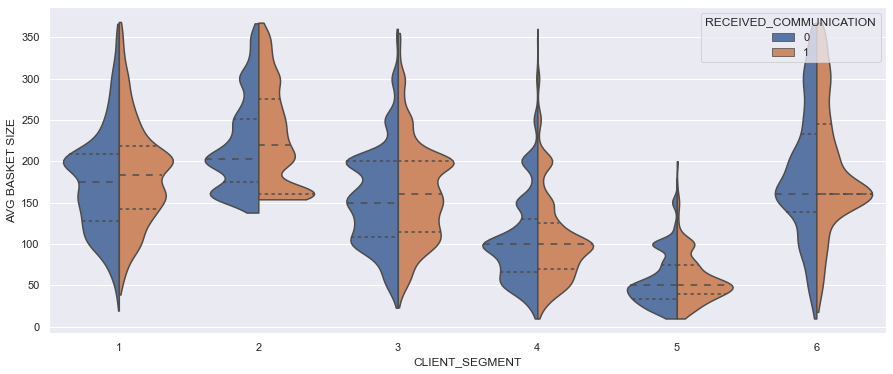

In [247]:
plt.figure(figsize=(15, 6))
ax = sns.violinplot(x="CLIENT_SEGMENT", y="AVG BASKET SIZE",
                    data=client_table, hue="RECEIVED_COMMUNICATION",
                    split=True, inner = "quartile",
                    cut=0)
plt.show()

Si observamos los segmentos de los clientes, hay una linea divisoria que separa la frecuencia de los clientes en si han recibido comunicación o no.
<ul>
    <li>El segmento 1 tiene un desplazamiento positivo en los clientes que han recibido la comunicación, de media llenan más la cesta de la compra. Del segmento 1, el 58% de clientes han recibido comunicación.</li>
    <li>El segmento 2 és el segmento que ha mostrado un cambio mayor respeto la promoción, de media, la cesta de la compra en piezas de fruta se ha desplazado positivamente. La promoción ha provocado que el segmento sea menos disperso. El 56% ha recibido promoción.</li>
    <li>El segmento 3 ha variado muy poco entre los que han recibido comunicación o no, no hay diferencias significativas, ni en forma ni en quartiles. El 54% ha recibido promoción.</li>
    <li>El segmento 4 tambien tiene muy poca variación, como el segmento 3, cabe decir que el rango intercuartílico está menos disperso. El 44.7% han recibido la promoción.</li>
    <li>El segmento 5, como el 3 y el 4, la variación es muy leve, casi nula, a simple vista podemos decir que el consumo de los clientes que han obtenido promoción tienen un pico más pronunciado en la mediana. El 24.85% han recibido promoción.</li>
    <li>Finalmente el segmento 6, observamos que la promoción hace que la compra se centre en un valor y no sea tan disperso, alrededor del 160 aproximadamente. Observamos que el 25% de las observaciones pertenecen al valor 160, y el IQR (rango intercuartílico) va de 160 a 245 piezas de fruta. El 58.22% de los clientes han recibido promoción.</li>
</ul>

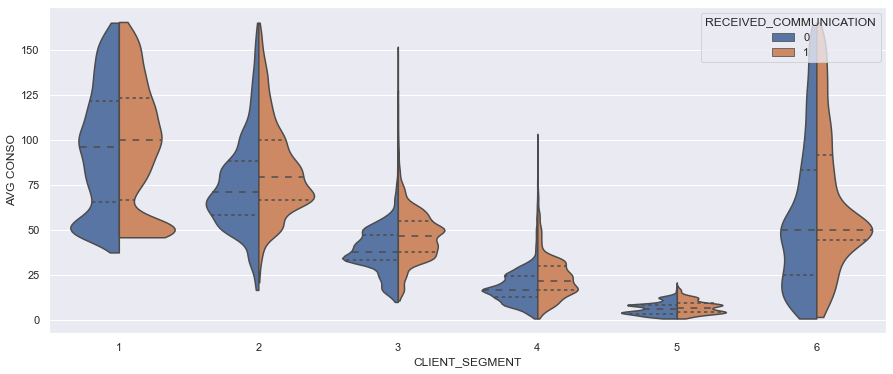

In [248]:
plt.figure(figsize=(15, 6))
ax = sns.violinplot(x="CLIENT_SEGMENT", y="AVG CONSO",
                    data=client_table, hue="RECEIVED_COMMUNICATION",
                    split=True, inner="quartile",
                    cut=0)
plt.show()

Si observamos los segmentos de los clientes, hay una linea divisoria que separa la frecuencia de los clientes en si han recibido comunicación o no.
<ul>
    <li>El segmento 1 tiene un desplazamiento positivo en los clientes que han recibido la comunicación, de media consumen más los que han recibido promoción que los que no. Este resultado concuerda si tenemos en cuenta que el segmento 1 llena más la cesta si recibe promoción.</li>
    <li>El segmento 2 és el segmento que ha mostrado un cambio mayor respeto la promoción, de media se consume más si el cliente recibe promoción, y el IQR es menos disperso, esto se debe a que los valores se agrupan más cerca de la mediana. La promoción ha provocado que el IQR sea más elevado, esto tiene sentido teniendo en cuenta que el IQR del AVG BASKET SIZE se ha incrementado.</li>
    <li>El segmento 3 ha variado en consumo más en comparación con el tamaño de la cesta. Observamos que el IQR se ha desplazado a un consumo mayor, tanto en media como en mediana.</li>
    <li>El segmento 4 tiene un comportamiento similar al segmento 3, el IQR se desplaza de forma positiva en consumo de piezas de fruta.</li>
    <li>El segmento 5, no tiene un cambio en el comportamiento respeto a la promoción, son valores muy concentrados.</li>
    <li>Finalmente el segmento 6, observamos que la promoción hace que el consumo se centre en un valor y no sea tan disperso, alrededor de 50 piezas de fruta. Observamos que el 25% de las observaciones pertenecen a un valor muy cercano a 50, y el IQR va de 45 a 90 piezas de fruta.</li>
</ul>

In [249]:
print("SEGMENTO 1 CON PROMOCIÓN:\n",client_promotion1[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 1 SIN PROMOCIÓN:\n",client_no_promotion1[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 2 CON PROMOCIÓN:\n",client_promotion2[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 2 SIN PROMOCIÓN:\n",client_no_promotion2[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 3 CON PROMOCIÓN:\n",client_promotion3[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 3 SIN PROMOCIÓN:\n",client_no_promotion3[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 4 CON PROMOCIÓN:\n",client_promotion4[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 4 SIN PROMOCIÓN:\n",client_no_promotion4[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 5 CON PROMOCIÓN:\n",client_promotion5[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 5 SIN PROMOCIÓN:\n",client_no_promotion5[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 6 CON PROMOCIÓN:\n",client_promotion6[['AVG CONSO', 'AVG BASKET SIZE']].describe())
print("SEGMENTO 6 SIN PROMOCIÓN:\n",client_no_promotion6[['AVG CONSO', 'AVG BASKET SIZE']].describe())

SEGMENTO 1 CON PROMOCIÓN:
          AVG CONSO  AVG BASKET SIZE
count  3782.000000      3782.000000
mean     97.296584       185.024955
std      34.536415        62.118625
min      45.920000        38.950000
25%      66.670000       142.130000
50%     100.000000       183.500000
75%     123.420000       218.135000
max     165.420000       368.330000
SEGMENTO 1 SIN PROMOCIÓN:
          AVG CONSO  AVG BASKET SIZE
count  2723.000000      2723.000000
mean     95.605667       175.054098
std      33.916875        61.624926
min      37.500000        19.550000
25%      65.625000       127.805000
50%      95.830000       175.000000
75%     121.420000       208.330000
max     165.000000       366.170000
SEGMENTO 2 CON PROMOCIÓN:
          AVG CONSO  AVG BASKET SIZE
count  3800.000000      3800.000000
mean     84.174955       230.243534
std      26.046107        60.363187
min      20.830000       154.000000
25%      66.670000       160.000000
50%      79.170000       220.000000
75%     100.000000 

<p>Des de un punto de vista más numérico, con las tablas descriptivas de los estadísticos básicos obtenemos que:</p>
<p>Segmento 1:</p>
<ul>
    <li>Variable AVG CONSO: tiene un promedio superior, el valor mínimo de consumo se ha incrementado un 24%, y con él el IQR que ha mantenido las proporciones, pero con valores más elevados, como es el caso de la mediana, que se ha incrementado un 5.2%</li>
    <li>Variable AVG BASKET SIZE: el valor promedio se incrementa en un 5.7%, el mismo incremento en el valor mediano, el IQR sufre un decremento del 6.1%, es decir, el consumo es menos disperso.</li>
</ul>
<p>Segmento 2:</p>
<ul>
    <li>Variable AVG CONSO: los clientes que tienen promoción tienen un consumo medio mensual 10 puntos superior a los clientes que no tienen promoción. El consumo mínimo se incrementa un 25% dependiendo si el cliente recibe promoción o no. El consumo máximo se ve incrementado también, como también la mediana, que se incrementa un 13% dependiendo si los clientes han recibido la promoción o no.</li>
    <li>Variable AVG BASKET SIZE: los clientes que reciben promoción de media añaden un 4.5% más de piezas de fruta en su cesta. Como podemos analizar, el consumo mediano se ha incrementado un 10%.</li>
</ul>
<p>Segmento 3:</p>
<ul>
    <li>Variable AVG CONSO: el consumo medio se ha incrementado un 20% si el cliente ha recibido promoción, el valor mediano también se ha incrementado un 21%.</li>
    <li>Variable AVG BASKET SIZE: el tamaño de la cesta ha incrementado de media un 5.9%, y la mediana se ha incrementado un 6.6%, es decir, que se han movido los valores a un tamaño de cesta superior.</li>
</ul>
<p>Segmento 4:</p>
<ul>
    <li>Variable AVG CONSO: el consumo medio se ha incrementado un 33.3%, y la mediana también se ha desplazado un 31.25%.</li>
    <li>Variable AVG BASKET SIZE: el tamaño de la cesta no se ha visto afectado por la promoción.</li> 
</ul>
<p>Segmento 5: este segmento representa el 9.56% de los clientes totales, y de estos, un 24.85% han recibido promoción. Observando el violinplot vemos que no hay cambios significativos en el comportamiento de este segmento de clientes, tanto a nivel consumo mensual, como nivel tamaño del cesto de la compra.</p>
<p>Segmento 6:</p>
<ul>
    <li>Variable AVG CONSO: observamos que el valor medio se ha incrementado un 17.5%, la mediana no ha sufrido variaciones, pero el rango intercuartílico se ha desplazado en positivo, el primer 25% de los datos pasa de un consumo de 25 piezas de fruta mensual a 44, y el cuartil 3 incrementa de 83 a 91 piezas de frutas consumidas (como observamos en el gráfico violinplot, los valores se centran en la mediana).</li>
    <li>Variable AVG BASKET SIZE: se incrementa el valor del basket size un 5%, el valor de la mediana, como ocurre con la variable AVG CONSO, no sufre variación, pero el valor mínimo tiene un incremento del 80%. Un dato curioso, y que avala la promoción hecha es que el cuartil 25%-50% se concentra en el valor de 160, un 16% mayor en comparación con los clientes que no han obtenido promoción. Esta variable tiene un comportamiento similar a la variable AVG CONSO, se concentra alrededor de la mediana, y la promoción acentúa este comportamiento.</li>
</ul>


<h2 id="modelo-pred" style="text-align: center; color: darkblue;">Modelo predictivo - clasificación de los clientes</h2>

Para realizar este modelo, tenemos de información, para entrenarlo, las variables 'CLIENT ID', 'AVG CONSO', 'AVG BASKET SIZE' y 'RECEIVED_COMMUNICATION'. Para clasificarlo, tenemos la variable 'CLIENT_SEGMENT'. Tenemos datos etiquetados, así que para realizarlo, usaremos modelos supervisados.

In [12]:
y = client_table['CLIENT_SEGMENT']
X = client_table[['AVG CONSO', 'AVG BASKET SIZE', 'RECEIVED_COMMUNICATION']]
test_table = pd.read_csv("hackatonMWC\mwc22-client_table+-+test_x.csv", header=0)

In [13]:
# Tratamos test_table
replace_comma(test_table['AVG CONSO'])
replace_comma(test_table['AVG BASKET SIZE'])
test_table['AVG CONSO'] = test_table['AVG CONSO'].astype("float")
test_table['AVG BASKET SIZE'] = test_table['AVG BASKET SIZE'].astype("float")
test_table_def = test_table.iloc[:, 1:4]

Para entrenar el modelo, separamos el dataFrame X y el y en train y test, con un test size del 0.2.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

Para calcular métricas, cargamos librerias de sklearn:

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Seguidamente, empezamos con un modelo supervisado de machine learning, que es el kNN.
<ul>
    <li>Primero realizamos una búsqueda de los hiperparámetros que dan mejor resultado.</li>
    <li>Seguidamente, con los hiperparámetros encontrados, realizamos la predicción y, finalmente el cálculo del F1 con el valor de average en macro.</li>
</ul>

In [25]:
#kNN

clf = KNeighborsClassifier()
            
param_grid = {"n_neighbors": range(1, 11), "weights": ["uniform", "distance"]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4)

grid_search.fit(X_train.values, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión promedio: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

Precisión promedio: 69.35 +/- 0.98 con parámetros {'n_neighbors': 1, 'weights': 'uniform'}
Precisión promedio: 69.35 +/- 0.98 con parámetros {'n_neighbors': 1, 'weights': 'distance'}
Precisión promedio: 73.26 +/- 1.18 con parámetros {'n_neighbors': 2, 'weights': 'uniform'}
Precisión promedio: 72.35 +/- 1.15 con parámetros {'n_neighbors': 2, 'weights': 'distance'}
Precisión promedio: 73.46 +/- 0.77 con parámetros {'n_neighbors': 3, 'weights': 'uniform'}
Precisión promedio: 73.00 +/- 0.75 con parámetros {'n_neighbors': 3, 'weights': 'distance'}
Precisión promedio: 74.76 +/- 0.96 con parámetros {'n_neighbors': 4, 'weights': 'uniform'}
Precisión promedio: 73.85 +/- 1.15 con parámetros {'n_neighbors': 4, 'weights': 'distance'}
Precisión promedio: 75.45 +/- 0.29 con parámetros {'n_neighbors': 5, 'weights': 'uniform'}
Precisión promedio: 74.63 +/- 0.40 con parámetros {'n_neighbors': 5, 'weights': 'distance'}
Precisión promedio: 76.33 +/- 0.84 con parámetros {'n_neighbors': 6, 'weights': 'unif

In [26]:
from sklearn.metrics import f1_score

clf_knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf_knn.fit(X_train.values, y_train)

y_pred_knn = clf_knn.predict(X_test.values)

accuracy = np.true_divide(np.sum(y_pred_knn == y_test), y_pred_knn.shape[0])*100
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average = 'macro')*100

print("El resultado del macro-f1 es:\n{}".format(f1))
print("\nEl resultado de accuracy es:\n{}".format(accuracy))
print("\nLa matriz de confusión es la siguiente:\n{}".format(cnf_matrix))

El resultado del macro-f1 es:
68.22707181622705

El resultado de accuracy es:
76.98202591612095

La matriz de confusión es la siguiente:
[[1243    0   45    0    0   13]
 [   0 1223  103    5    0   21]
 [  48   64 1308  197    0    8]
 [   2    1  201 1168  213    0]
 [   0    0    0  128  558    0]
 [ 135  232  112  103   21   25]]


Obtenemos un accuracy del 76.98%, y un valor para macro-F1 del 68.22%.

Seguidamente, seguimos con el Random Forest.
<ul>
    <li>Primero realizamos una búsqueda de los hiperparámetros que dan mejor resultado.</li>
    <li>Seguidamente, con los hiperparámetros encontrados, realizamos la predicción y, finalmente el cálculo del F1 con el valor de average en macro.</li>
</ul>

In [27]:
# RandomForest
clf = RandomForestClassifier()

param_grid = {"max_depth": range(6, 13), "n_estimators": [10, 50, 100, 200]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión promedio: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

Precisión promedio: 77.30 +/- 0.33 con parámetros {'max_depth': 6, 'n_estimators': 10}
Precisión promedio: 77.94 +/- 0.28 con parámetros {'max_depth': 6, 'n_estimators': 50}
Precisión promedio: 77.95 +/- 0.29 con parámetros {'max_depth': 6, 'n_estimators': 100}
Precisión promedio: 78.04 +/- 0.31 con parámetros {'max_depth': 6, 'n_estimators': 200}
Precisión promedio: 77.97 +/- 0.35 con parámetros {'max_depth': 7, 'n_estimators': 10}
Precisión promedio: 78.23 +/- 0.41 con parámetros {'max_depth': 7, 'n_estimators': 50}
Precisión promedio: 78.21 +/- 0.47 con parámetros {'max_depth': 7, 'n_estimators': 100}
Precisión promedio: 78.32 +/- 0.53 con parámetros {'max_depth': 7, 'n_estimators': 200}
Precisión promedio: 78.16 +/- 0.45 con parámetros {'max_depth': 8, 'n_estimators': 10}
Precisión promedio: 78.32 +/- 0.48 con parámetros {'max_depth': 8, 'n_estimators': 50}
Precisión promedio: 78.32 +/- 0.49 con parámetros {'max_depth': 8, 'n_estimators': 100}
Precisión promedio: 78.33 +/- 0.49 con

In [32]:
clf_rf = RandomForestClassifier(n_estimators = 200, max_depth = 8)
clf_rf.fit(X_train.values, y_train)

y_pred_random_forest = clf_rf.predict(X_test.values)

accuracy = np.true_divide(np.sum(y_pred_random_forest == y_test), y_pred_random_forest.shape[0])*100
cnf_matrix = confusion_matrix(y_test, y_pred_random_forest)
f1 = f1_score(y_test, y_pred_random_forest, average = 'macro')*100

print("El resultado del macro-f1 es:\n{}".format(f1))
print("\nEl resultado de accuracy es:\n{}".format(accuracy))
print("\nLa matriz de confusión es la siguiente:\n{}".format(cnf_matrix))

El resultado del macro-f1 es:
69.42812903441119

El resultado de accuracy es:
77.92949700431934

La matriz de confusión es la siguiente:
[[1251    2   29    0    0   19]
 [   0 1225  109    3    0   15]
 [  46   59 1352  168    0    0]
 [   5    0  218 1223  139    0]
 [   0    0    0  183  503    0]
 [ 124  225  118  108   14   39]]


Obtenemos un macro-F1 del valor de 69.43% y una accuracy del 77.92%.

<p><b>En conclusión</b> ambos modelos dan un macro-F1 del 68.22% en el caso de kNN, y un 69.43% en el caso de Random Forest.</p>
<p>Como mejor modelo, comparando accuracy y macro-F1 tenemos el Random Forest, y por lo tanto, la predicción del segmento de los clientes del dataset <b>test_table</b> lo haremos mediante este algoritmo.</p>

Predicción del valor del segmento para el dataset test_table:

In [45]:
y_pred_rf_test_table = clf_rf.predict(test_table_def.values)
y_pred_rf_test_table = list(y_pred_rf_test_table)

In [46]:
print("El valor de los segmento al que pertenecen los clientes del dataset test_table, predicho mediante RandomForest, son:\n{}".format( y_pred_rf_test_table))

El valor de los segmento al que pertenecen los clientes del dataset test_table, predicho mediante RandomForest, son:
[4, 1, 3, 4, 4, 4, 4, 3, 4, 1, 1, 1, 2, 5, 1, 3, 4, 1, 1]


Creamos un dataframe nuevo para poner el cliente con su predicción, y lo pasamos a csv como un documento nuevo con nombre results.csv:

In [61]:
listClient = []
for i in test_table['CLIENT ID']:
    listClient.append(i)

client_result = list(zip(listClient, y_pred_rf_test_table))

df_client_result = pd.DataFrame(client_result, columns=['CLIENT ID', 'CLIENT_SEGMENT'])

In [60]:
df_client_result.to_csv('results.csv', sep=',', encoding='utf-8', index=False)